In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis
## Shape analysis
- **Shape** : 380 lines, 12 columns
- **variables types** : qualitative variable : 2, quantitative variable : 10
- **Nan** : No missing values
## Background analysis
- **Target** :  global (56 % of *over 2,5* class)
- **Variables meaning**: 
    * Data distribution are not Gaussian; did follow a poisson distribution ?
    * We observe that for most team, there is a difference (mode, std, mean, outliers) between values recorded at home and these recorded at away.
    * In a match, the team result is closely tied with other team result
    
- **Target / Feature relationship** : 
    `We know that the target is in fact the sum between scored and conceded.`
    * Target / Scored: The relationship between our two variables are positively correlated,\
    though for certain teams, there's either a week or no relationship.
    * Target / Conceded: same point of view like before.\
    It seems like match results might be highly correlated with the result of one team only (the strongest ?)
    ```
    While the match results are highly correlated with the results of one team only, other team result are not\
    correlated with the match results.
    ```

- **Feature / Feature relationship**:
    * Scored / Conceded : low correlation, négative.
    
- **Conclusion initial**: We divide the team in two groups:
    * Strong team ( which the match result depend more, cause of their offensive and defensive force)\
     there's a hight positive correlation between the goal they scored and the final result of the match.
    * weak team (whom conceded more than they scored) witch the final result depend more of the adversaire.\
    There's a high correlation between the final result and their goal conceded.   

## Detailed analysis
- **bad attack | good defense**
    * Teams whom scored less and conceded less (under 1,5) have balanced classes in which we can find as much `under` than `over` 

## Hypothèses H0:
 - si le match oppose une équipe forte (good attack and good defense) à une équipe faible (bad attack and bad defense), le résultat du match dépendra énormement au résultat du l'équipe forte (scored)
 - le résultat final d'un match est influencé par les résultats cummulé des parties prenantes.

In [4]:
from pathlib import Path
p = Path.cwd()
p = p.parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df = pd.read_csv(p, index_col='date_time', parse_dates=True)
df.head()

journée   home_team    away_team  1st_home_team_goal  \
date_time                                                                   
2023-06-03 19:00:00       38  AC Ajaccio    Marseille                   0   
2023-06-03 19:00:00       38        Nice         Lyon                   3   
2023-06-03 19:00:00       38      Troyes        Lille                   0   
2023-06-03 19:00:00       38       Reims  Montpellier                   1   
2023-06-03 19:00:00       38         PSG     Clermont                   2   

                     1st_away_team_goal  1st_total_goal  2nd_home_team_goal  \
date_time                                                                     
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   1               4                   0   
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   0               1                   0   
2023-06-03 19:00:00                   2               4                   0   

                     2nd_away_team_goal  2nd_total_goal  total_home_team_goal  \
date_time                                                                       
2023-06-03 19:00:00                   0               1                     1   
2023-06-03 19:00:00                   0               0                     3   
2023-06-03 19:00:00                   1               2                     1   
2023-06-03 19:00:00                   3               3                     1   
2023-06-03 19:00:00                   1               1                     2   

                     total_away_team_goal  global  
date_time                                          
2023-06-03 19:00:00                     0       1  
2023-06-03 19:00:00                     1       4  
2023-06-03 19:00:00                     1       2  
2023-06-03 19:00:00                     3       4  
2023-06-03 19:00:00                     3       5

In [5]:
df.shape

(380, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2023-06-03 19:00:00 to 2022-08-05 19:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   journée               380 non-null    int64 
 1   home_team             380 non-null    object
 2   away_team             380 non-null    object
 3   1st_home_team_goal    380 non-null    int64 
 4   1st_away_team_goal    380 non-null    int64 
 5   1st_total_goal        380 non-null    int64 
 6   2nd_home_team_goal    380 non-null    int64 
 7   2nd_away_team_goal    380 non-null    int64 
 8   2nd_total_goal        380 non-null    int64 
 9   total_home_team_goal  380 non-null    int64 
 10  total_away_team_goal  380 non-null    int64 
 11  global                380 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 38.6+ KB


In [7]:
# drop columns who won't be part of a study
df.drop(['1st_home_team_goal', '1st_away_team_goal', '1st_total_goal',
         '2nd_home_team_goal', '2nd_away_team_goal', '2nd_total_goal'],
         axis=1, inplace=True)

In [8]:
print(f"{df['global'].sum()} buts total")
print(f"{df['global'].mean()} but moyen par match")
print(f"{df['total_home_team_goal'].sum()} goals scored by team at home / conceded by team at away")
print(f"{df['total_away_team_goal'].sum()} goals conceded by team at home / scored by team at away")

1067 buts total
2.807894736842105 but moyen par match
566 goals scored by team at home / conceded by team at away
501 goals conceded by team at home / scored by team at away


Text(0.5, 1.0, 'class')

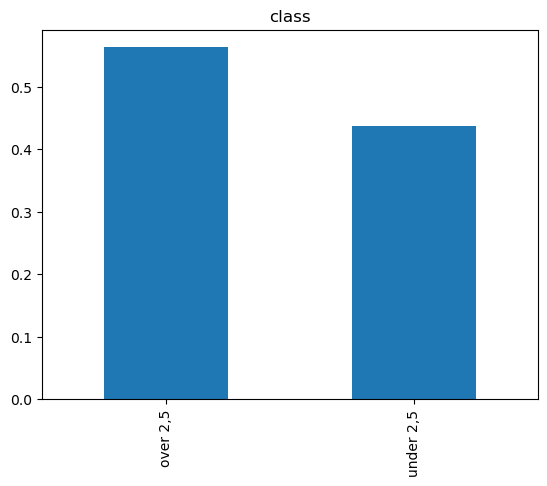

In [9]:
plt.figure()
labels_name = ['under 2,5', 'over 2,5']
df['class'] = pd.cut(x=df['global'], bins=[min(df['global']), 2, max(df['global'])],
              labels=labels_name, include_lowest=True)
df['class'].value_counts(normalize=True).plot.bar()
plt.title('class')


In [10]:
df.columns

Index(['journée', 'home_team', 'away_team', 'total_home_team_goal',
       'total_away_team_goal', 'global', 'class'],
      dtype='object')

In [11]:
dico = {'total_home_team_goal': 'home_team_scored',
        'total_away_team_goal': 'home_team_conceded'}
df.rename(columns=dico, inplace=True)
df['away_team_scored'] = df['home_team_conceded']
df['away_team_conceded'] = df['home_team_scored']
df.columns

Index(['journée', 'home_team', 'away_team', 'home_team_scored',
       'home_team_conceded', 'global', 'class', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

### Visualisation des variables
* Crée une fonction *viz* qui prend pour argument le nom de l'équipe a observer
* crée deux sous-ensemble de données (domicile et extérieur)
* Observer pour chaque sous ensemble, la variable sélectionner

In [12]:
def viz_target(team):
    """_summary_

    Args:
        team (str): Nom de l'équipe à observer
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.histplot(data=home, x=home['global'], kde=True, ax=axs[0], hue=home['class'], discrete=True)
    sns.histplot(data=away, x=away['global'], kde=True, ax=axs[1], hue=away['class'], discrete=True)
    axs[0].set_xlabel('global at home')
    axs[1].set_xlabel('global at away')
    plt.title(team)
    plt.show()

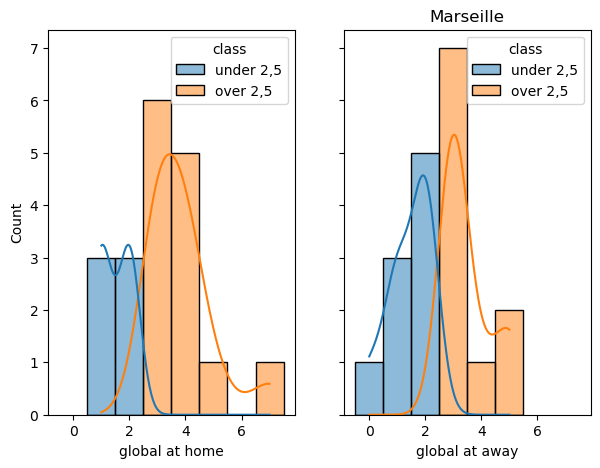

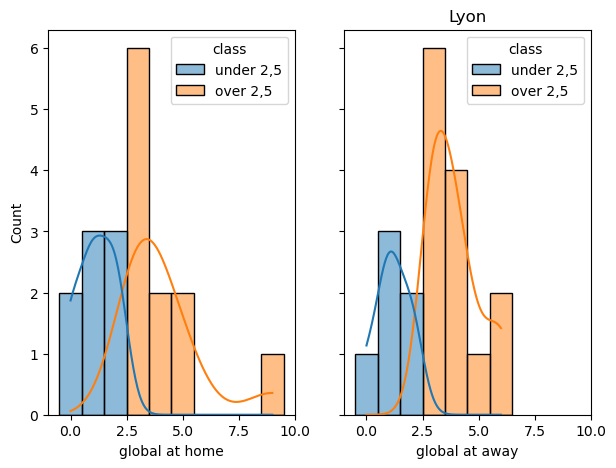

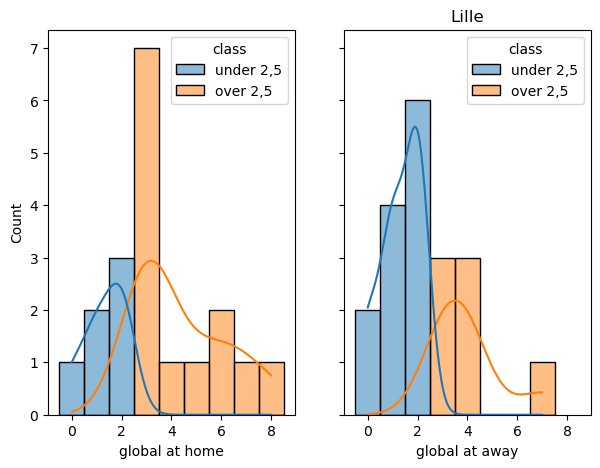

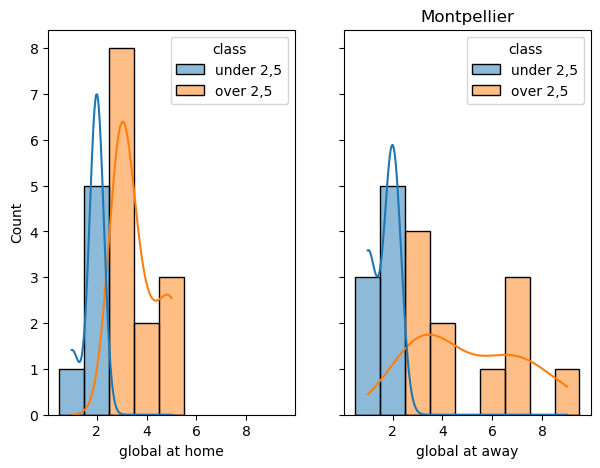

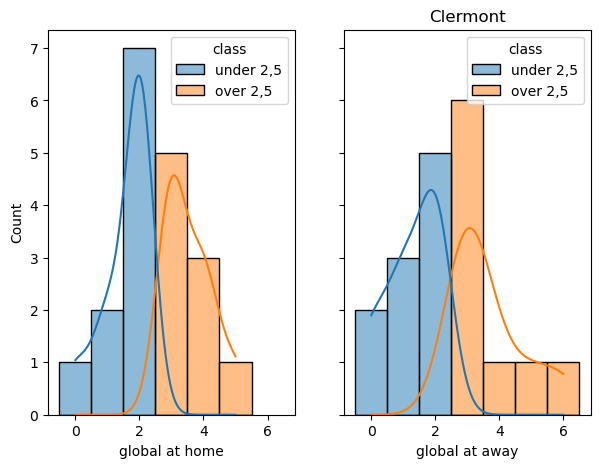

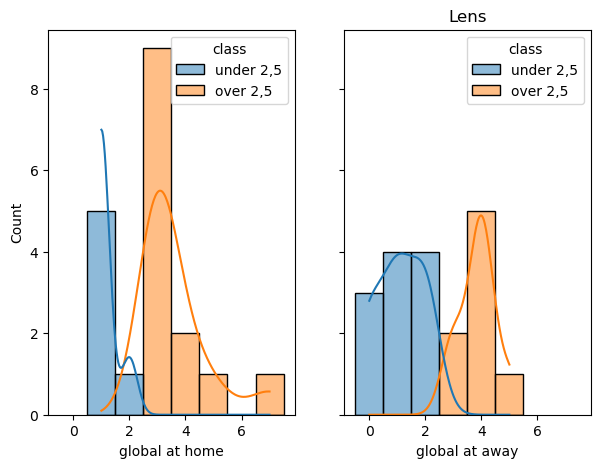

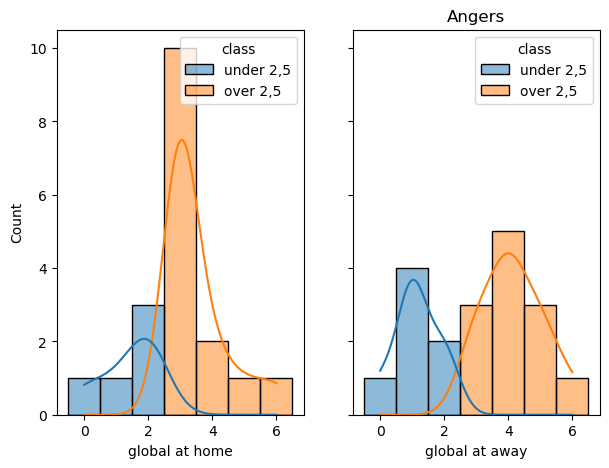

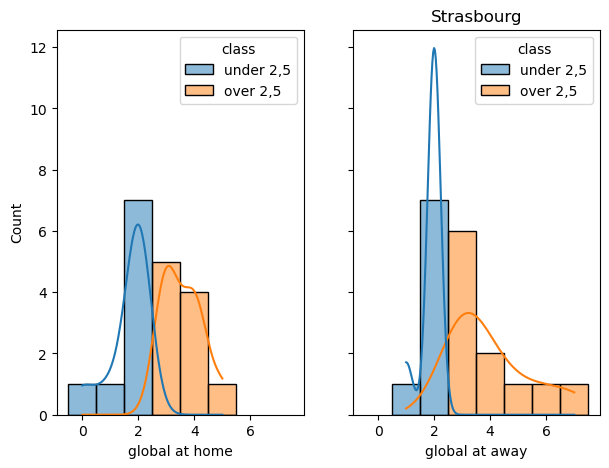

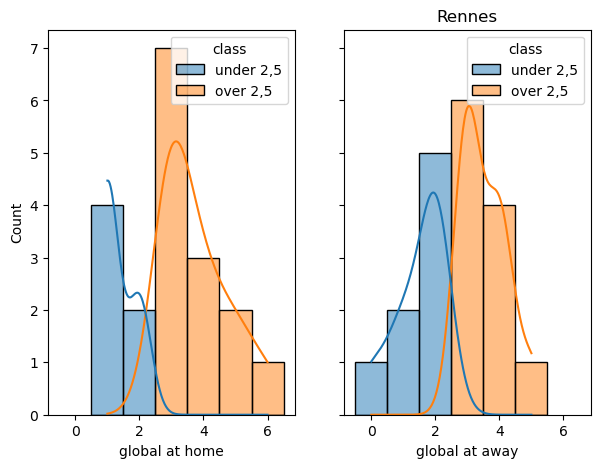

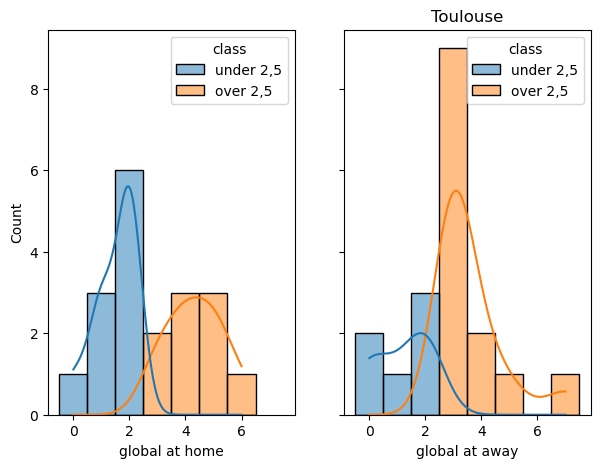

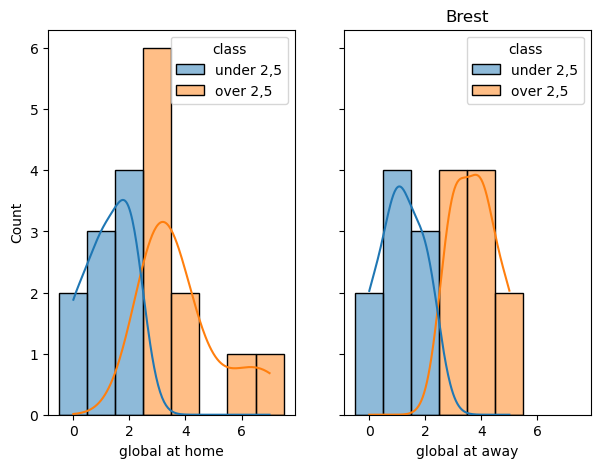

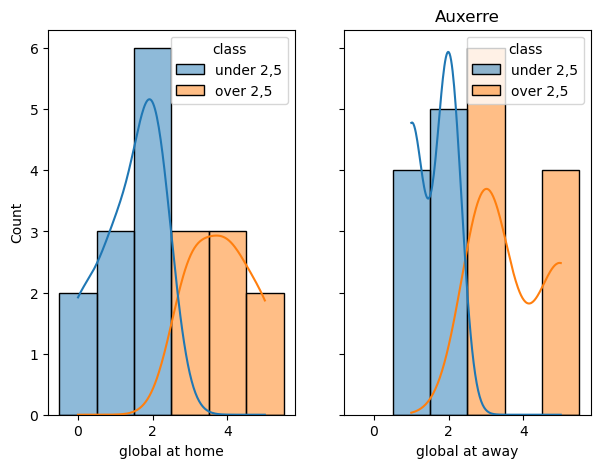

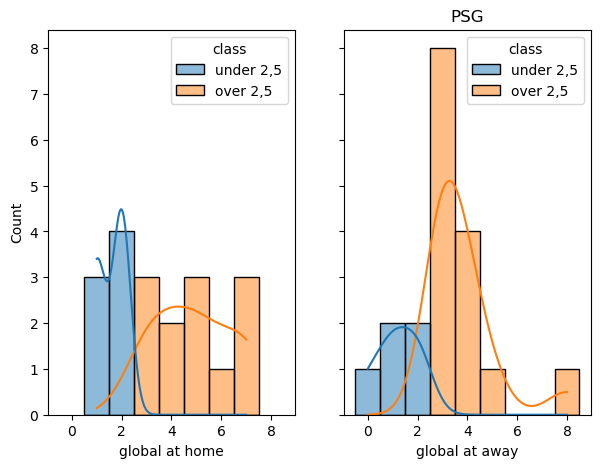

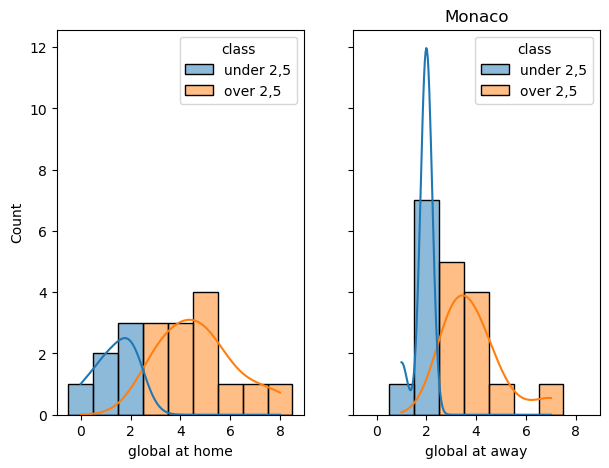

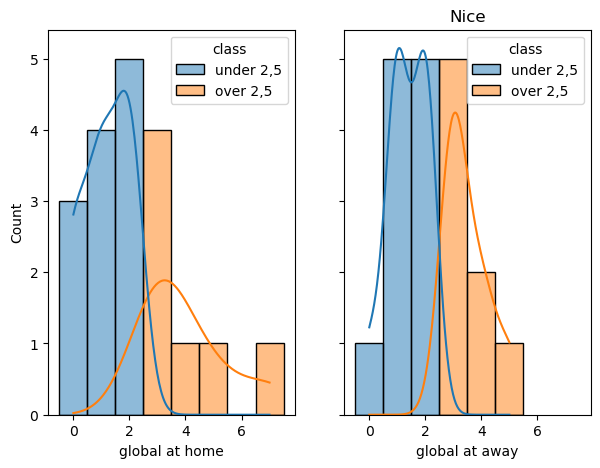

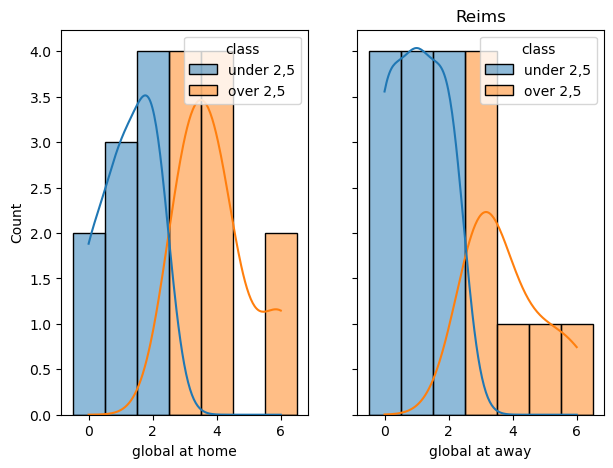

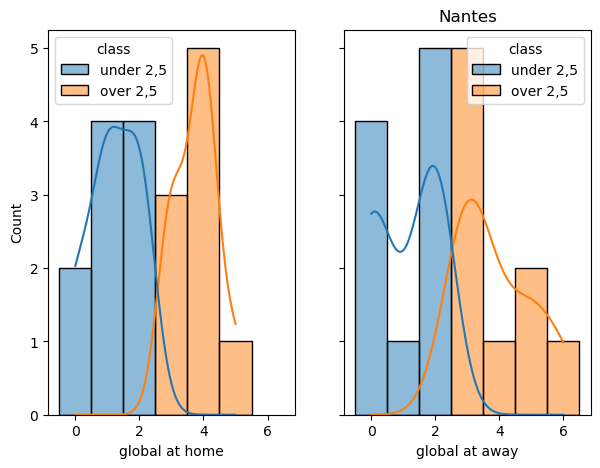

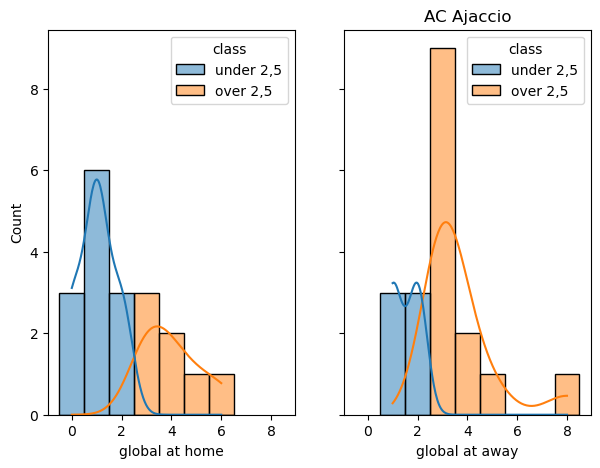

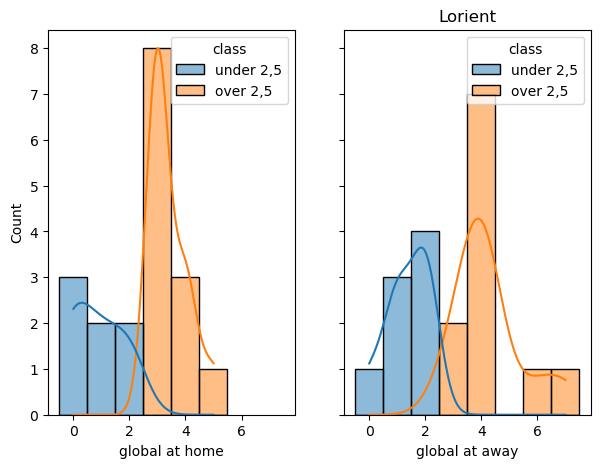

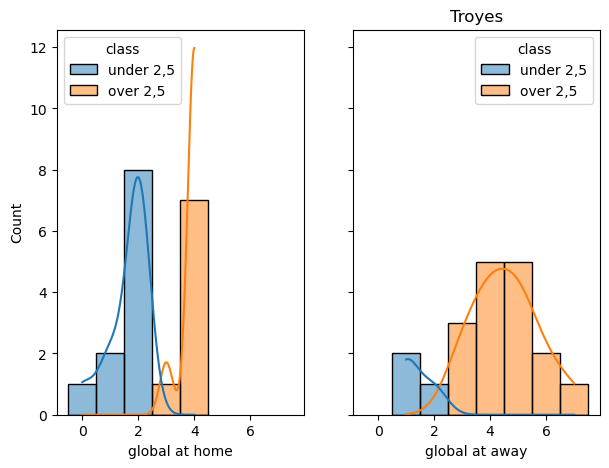

In [13]:
for team in df['away_team'].unique():
    viz_target(team)

In [14]:
def viz_feature(team, feature):
    """_summary_

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.histplot(data=home, x=home[f'home_team_{feature}'], kde=True, ax=axs[0], hue=home['class'], discrete=True)
    sns.histplot(data=away, x=away[f'away_team_{feature}'], kde=True, ax=axs[1], hue=away['class'], discrete=True)
    axs[0].set_xlabel(f'{feature} at home')
    axs[1].set_xlabel(f'{feature} at away')
    plt.title(team)
    plt.show()

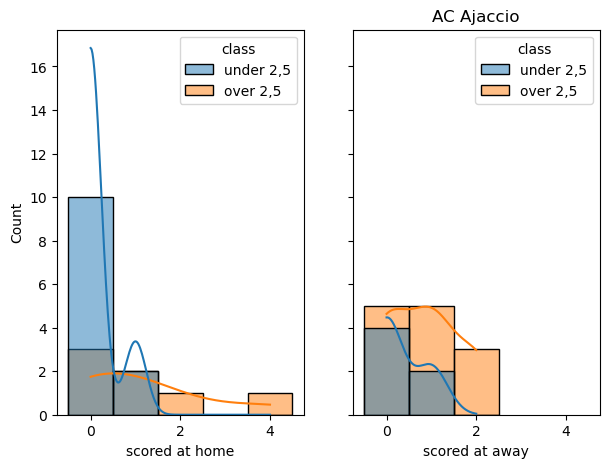

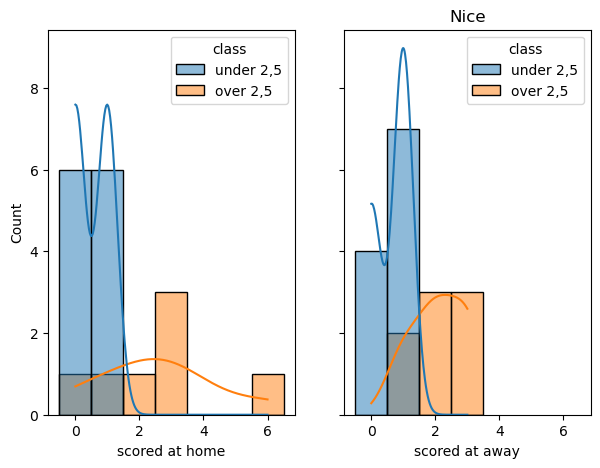

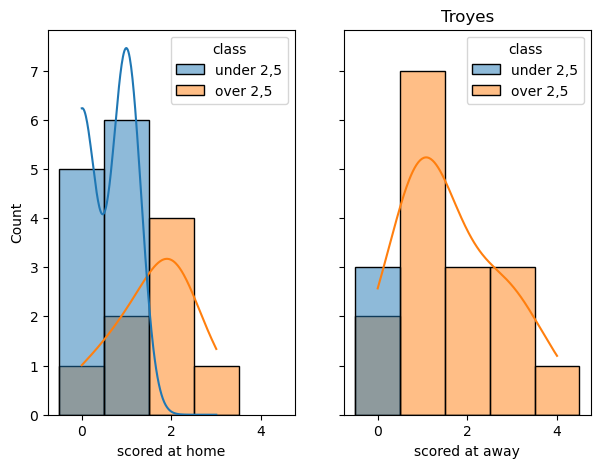

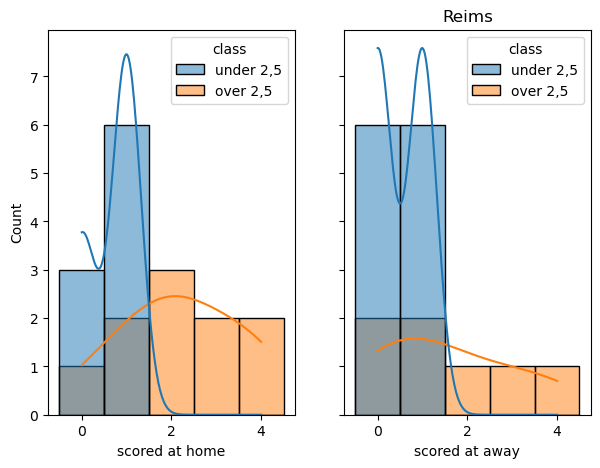

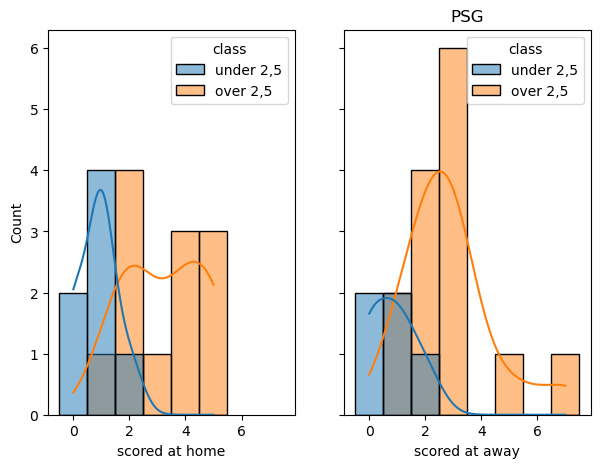

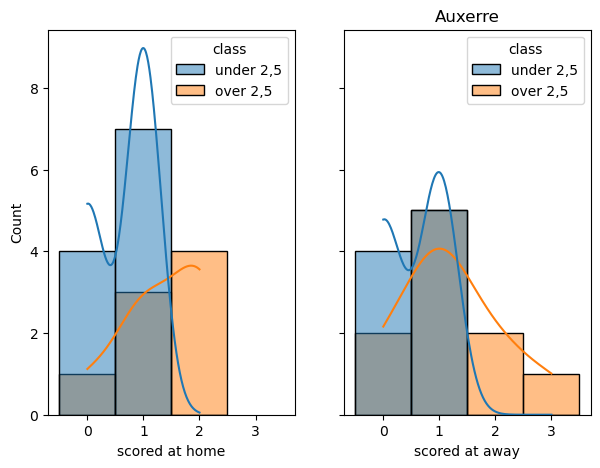

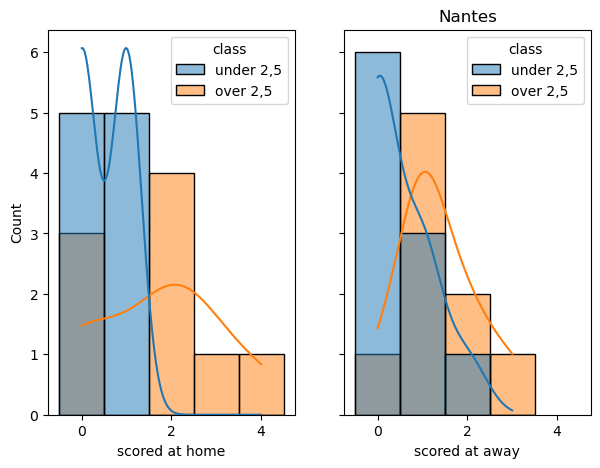

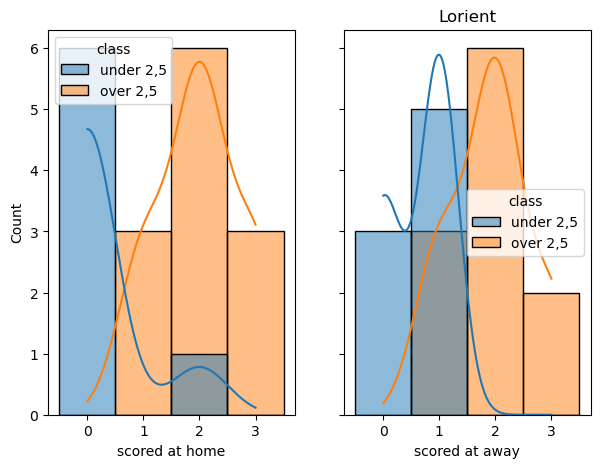

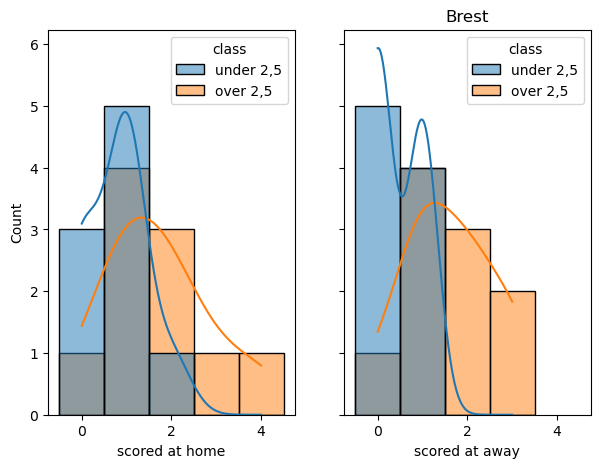

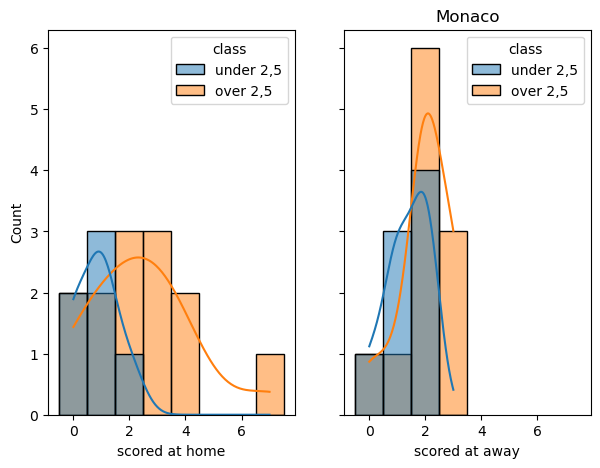

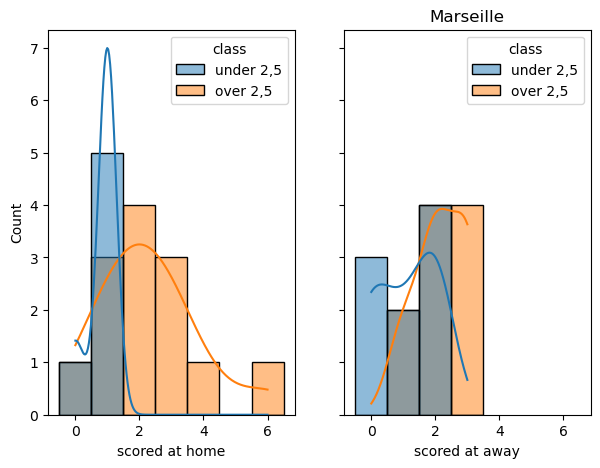

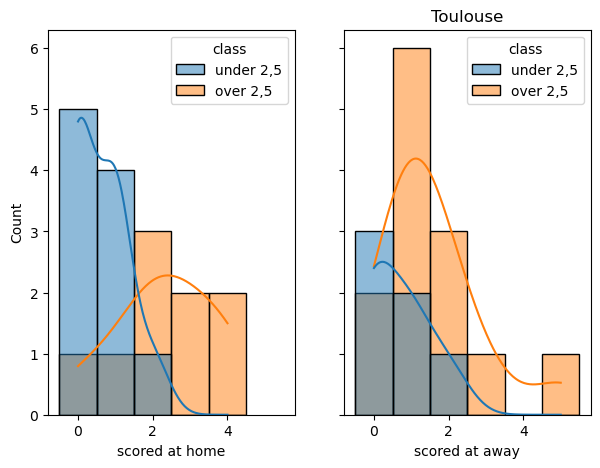

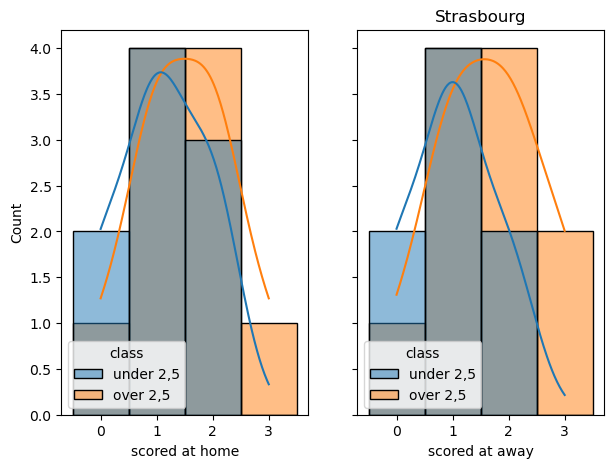

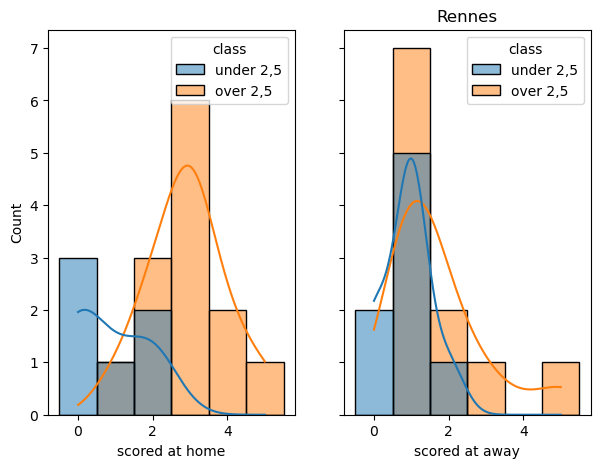

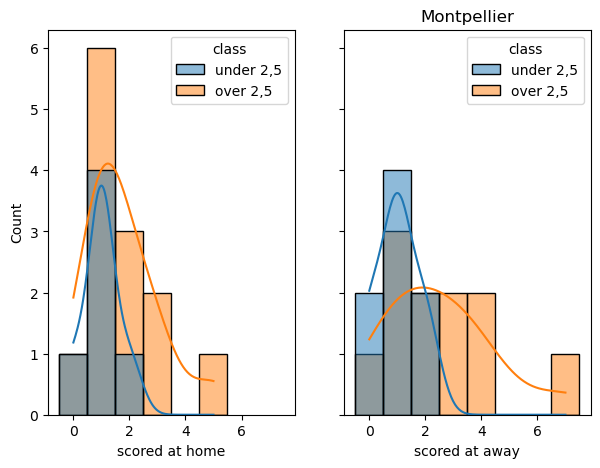

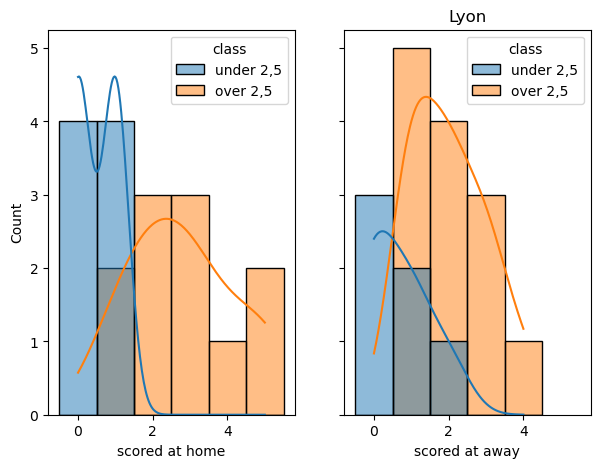

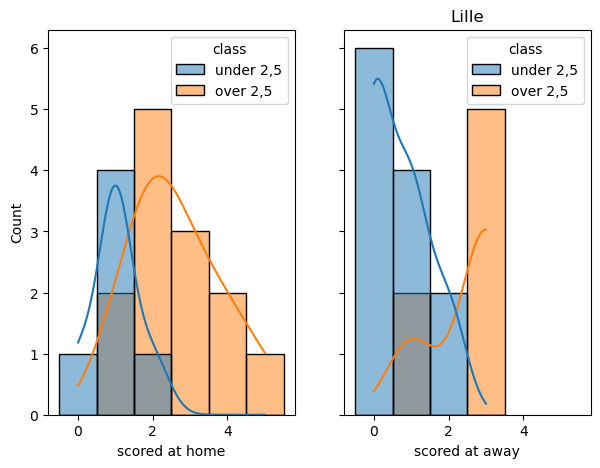

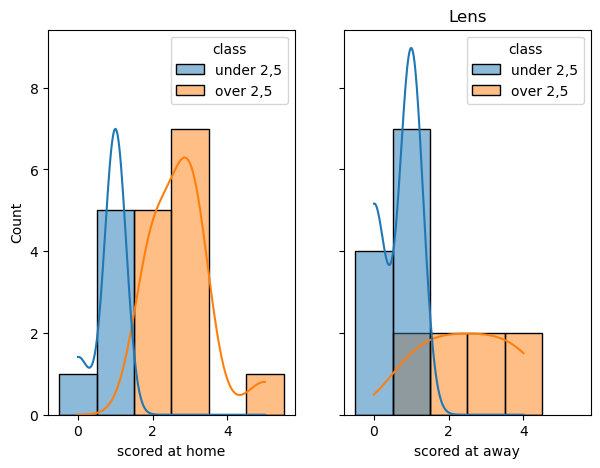

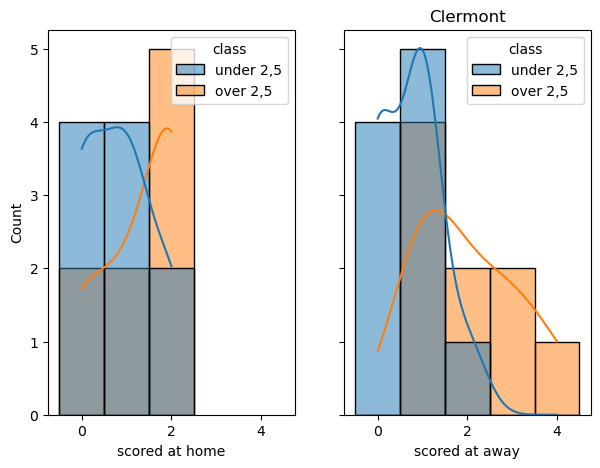

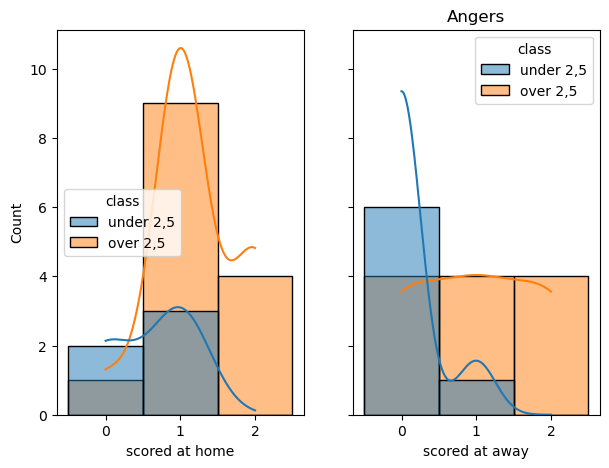

In [15]:
for team in df.home_team.unique():
    viz_feature(team, feature='scored')

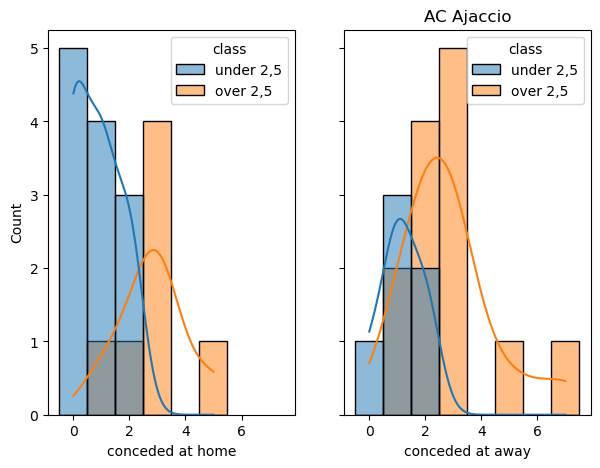

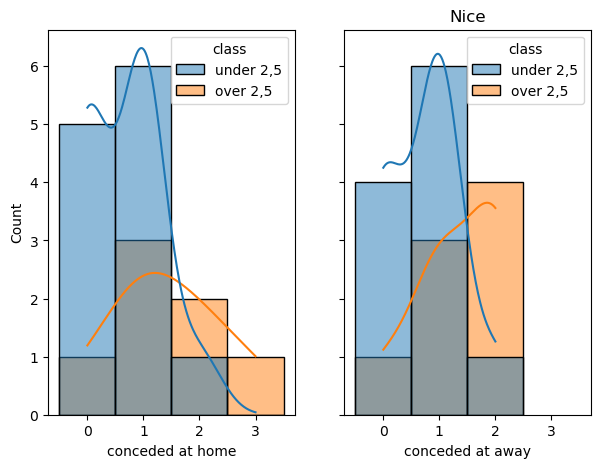

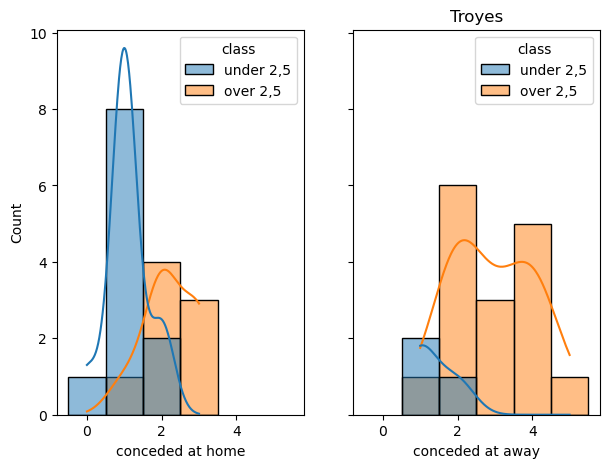

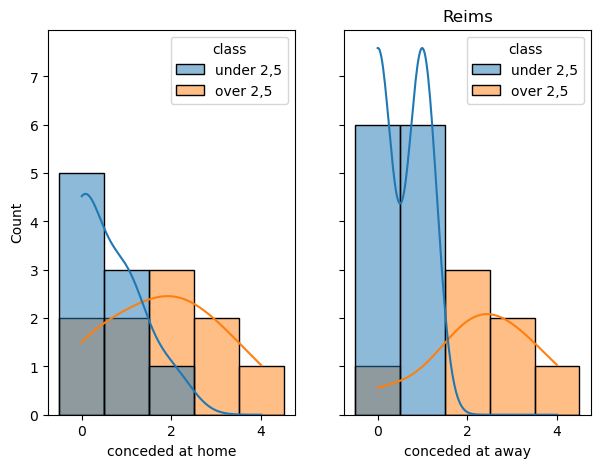

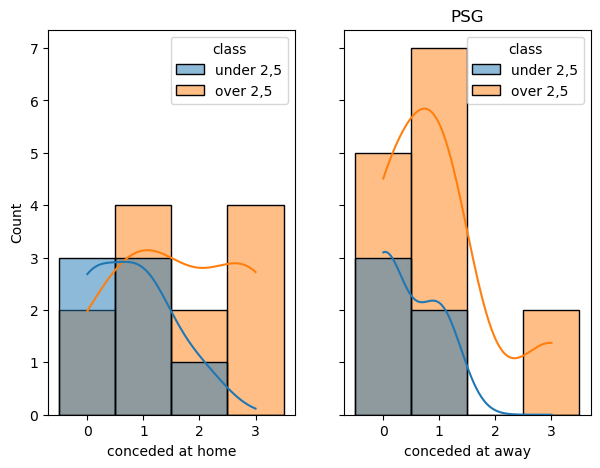

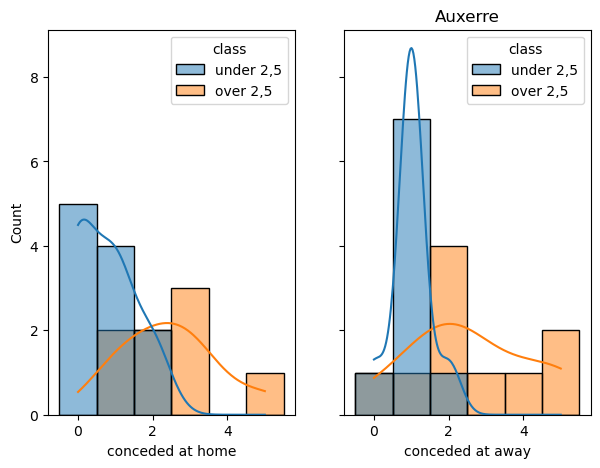

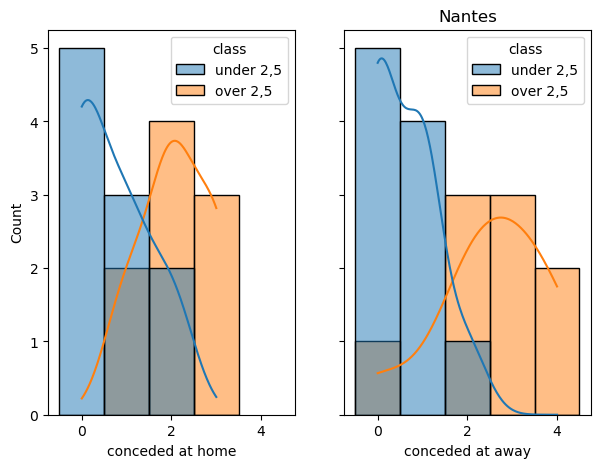

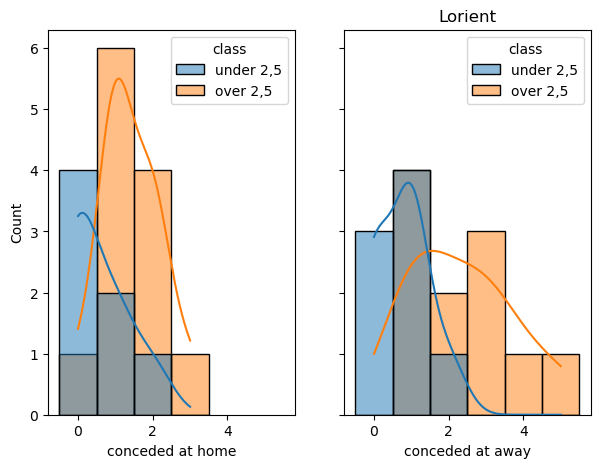

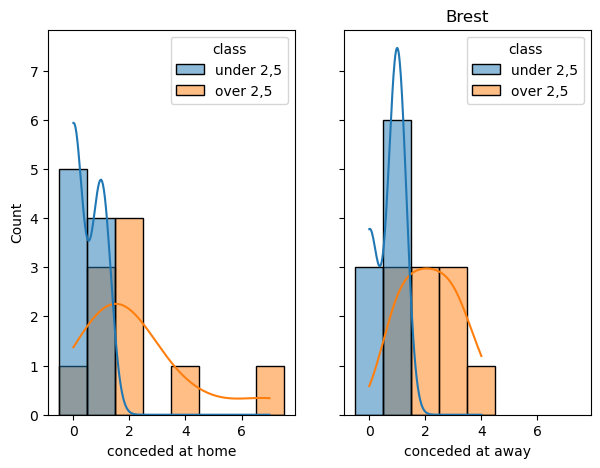

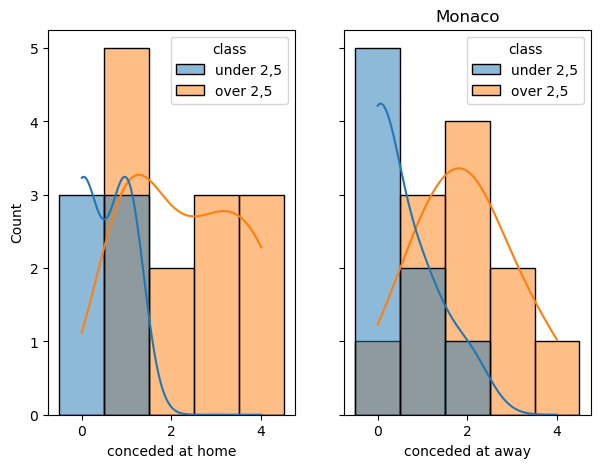

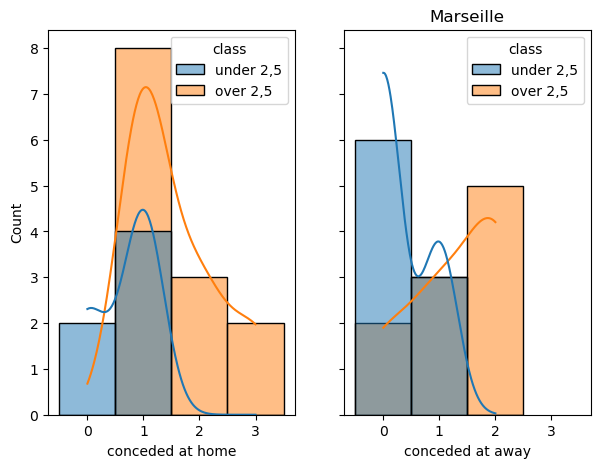

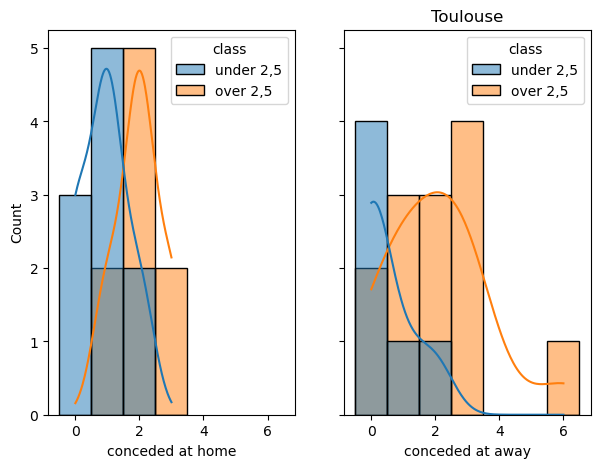

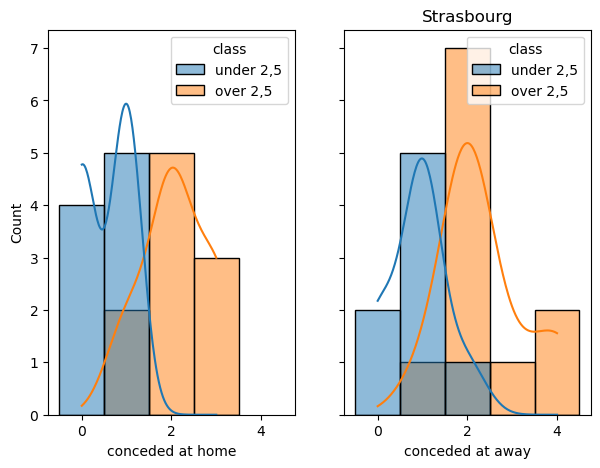

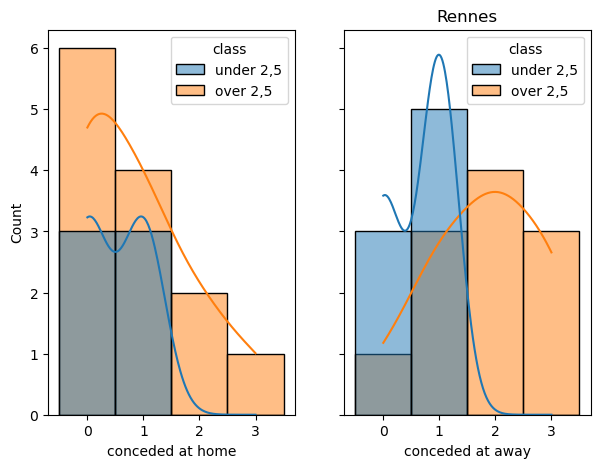

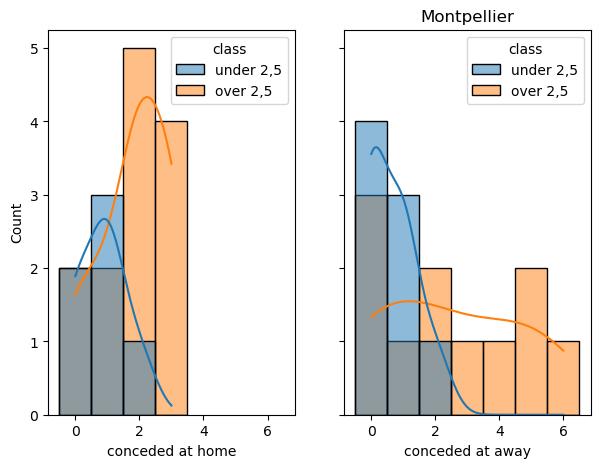

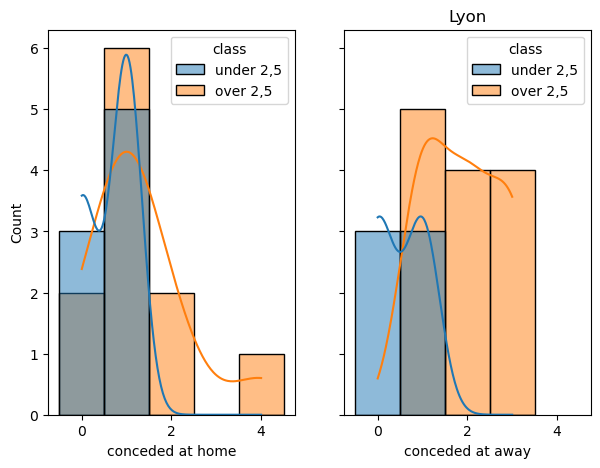

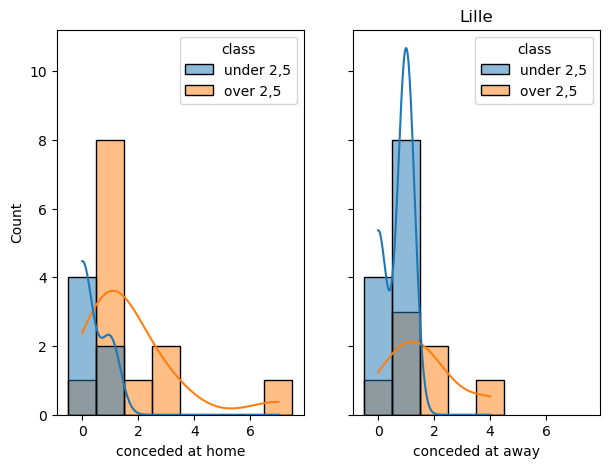

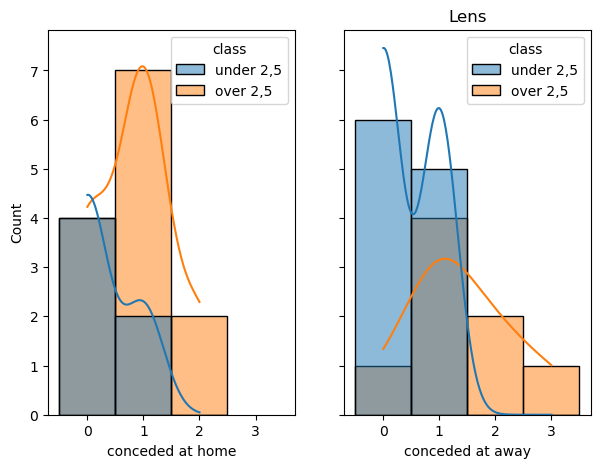

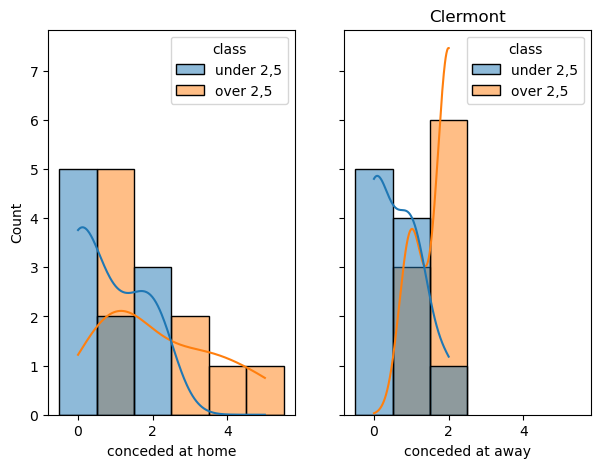

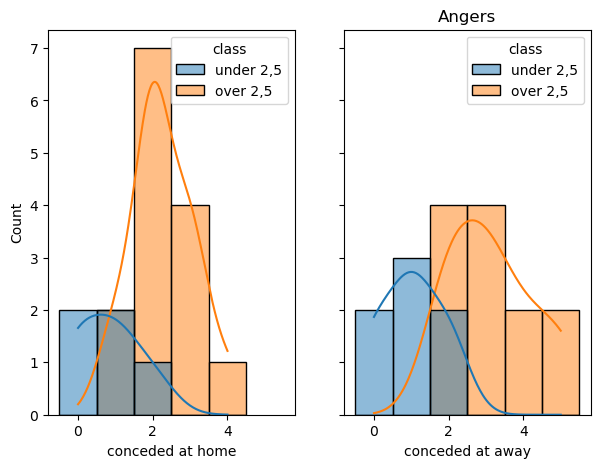

In [16]:
for team in df.home_team.unique():
    viz_feature(team, feature='conceded')

## Target / Feature relationship

In [17]:
df.columns

Index(['journée', 'home_team', 'away_team', 'home_team_scored',
       'home_team_conceded', 'global', 'class', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

In [18]:
def rel_feature(team, feature):
    """Observe la rélation entre la target et `feature`

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.scatterplot(data=home, x=home['global'], y=home[f'home_team_{feature}'], hue=home['class'],
                    ax=axs[0])
    axs[0].set_xlabel('global at home')
    axs[0].set_ylabel(f'{feature} at home')
    sns.scatterplot(data=away, x=away['global'], y=away[f'away_team_{feature}'], hue=away['class'],
                    ax=axs[1])
    axs[1].set_xlabel('global at away')
    axs[1].set_ylabel(f'{feature} at away')
    plt.title(team)
    plt.suptitle(f'Target / {feature} relationship')
    plt.show()

#### [ Target | Scored ]

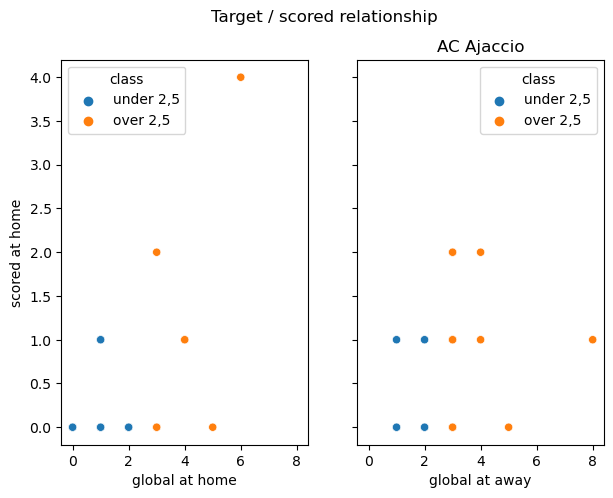

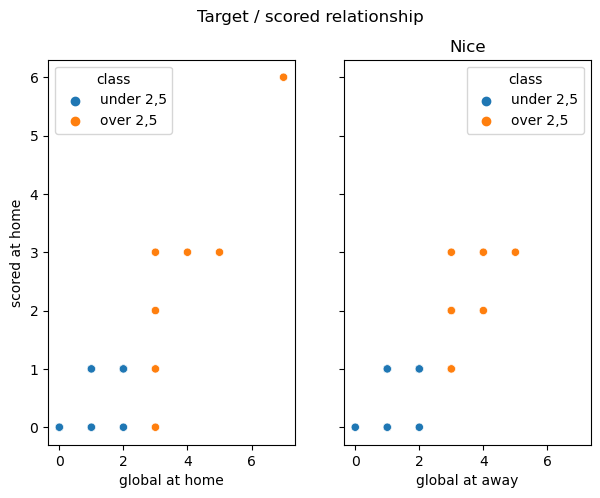

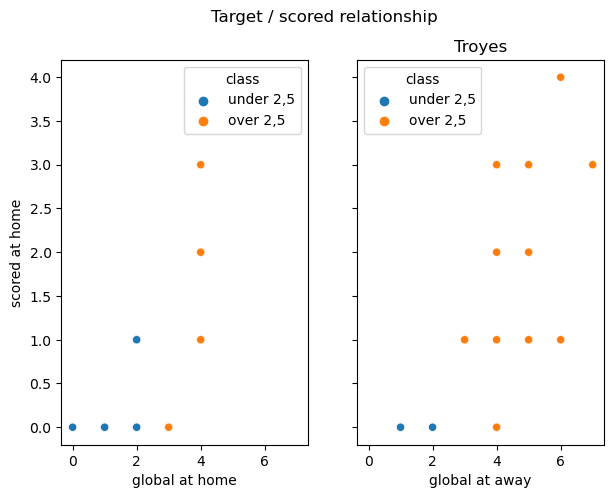

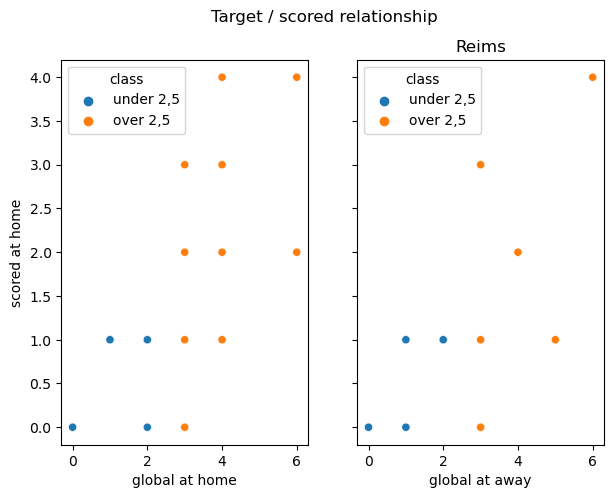

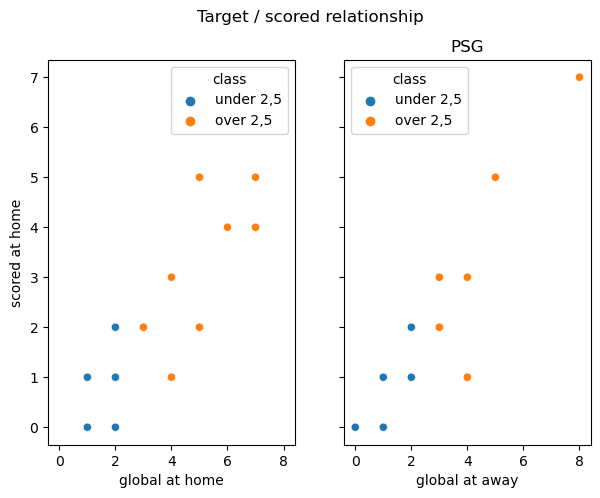

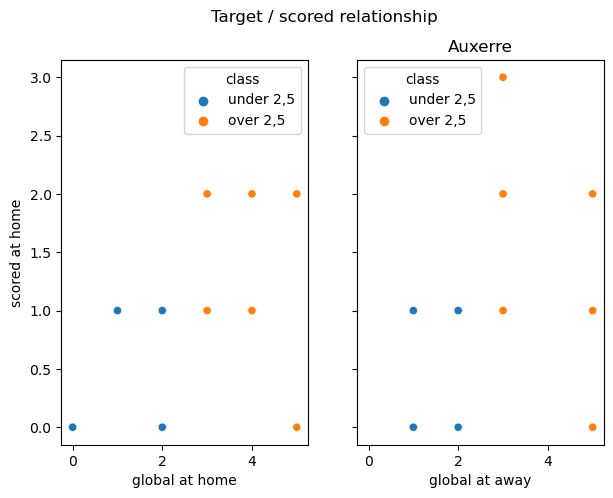

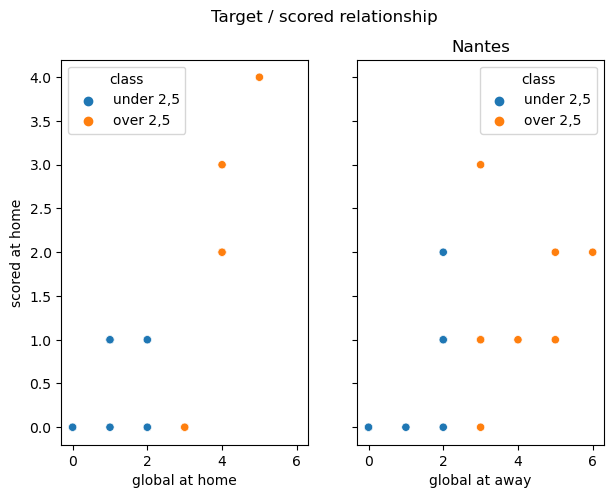

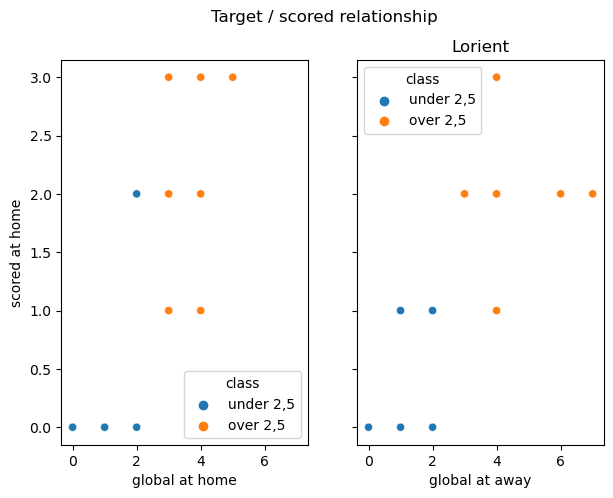

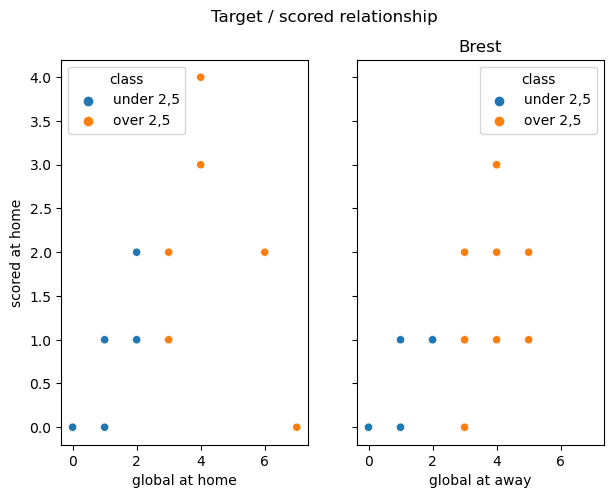

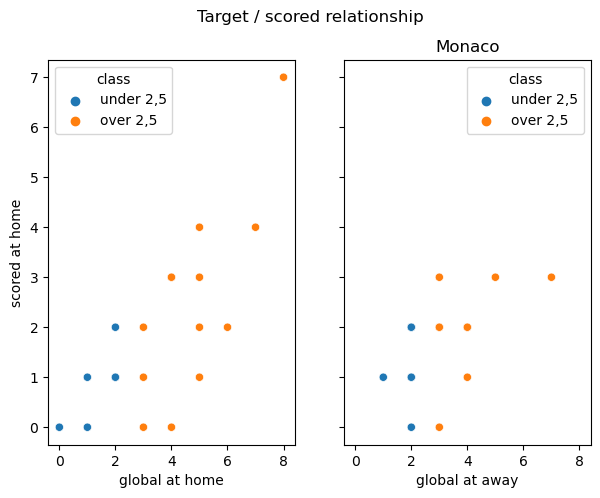

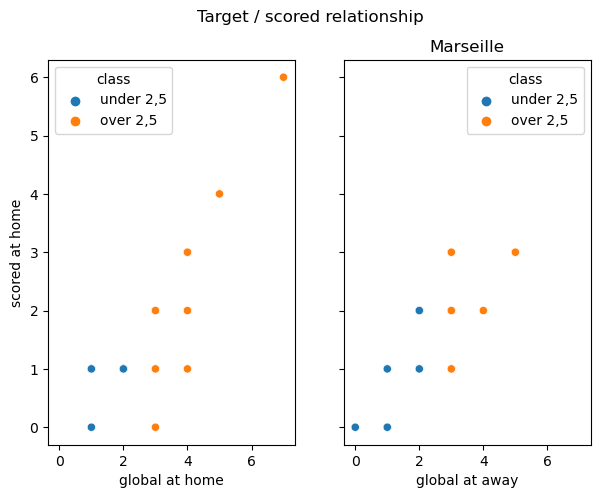

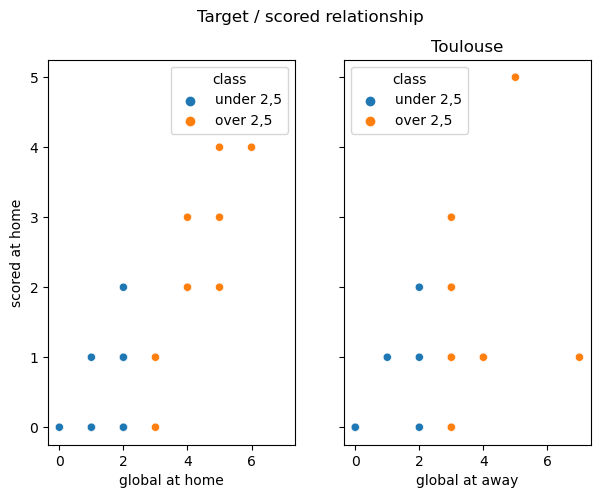

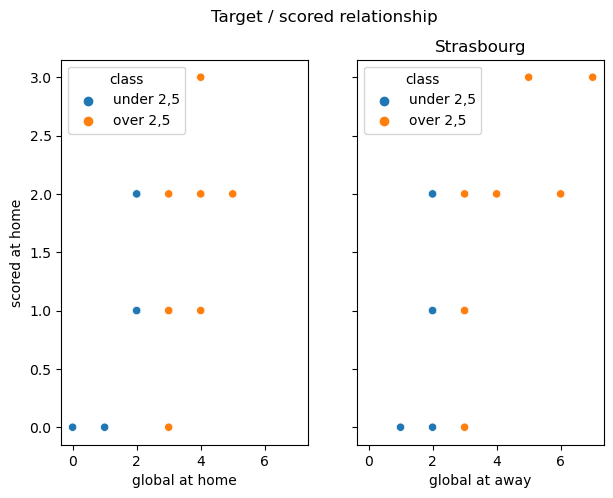

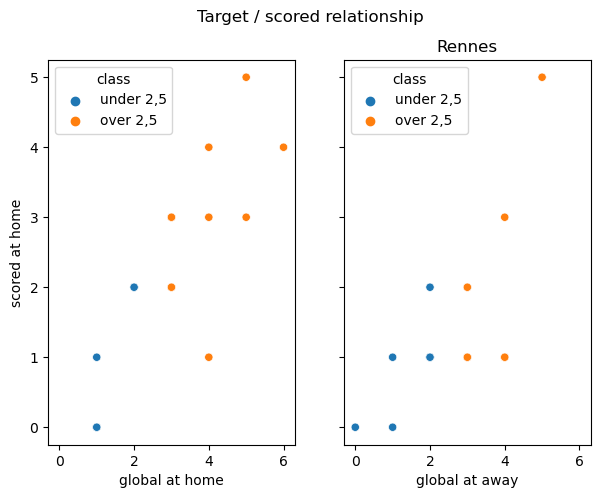

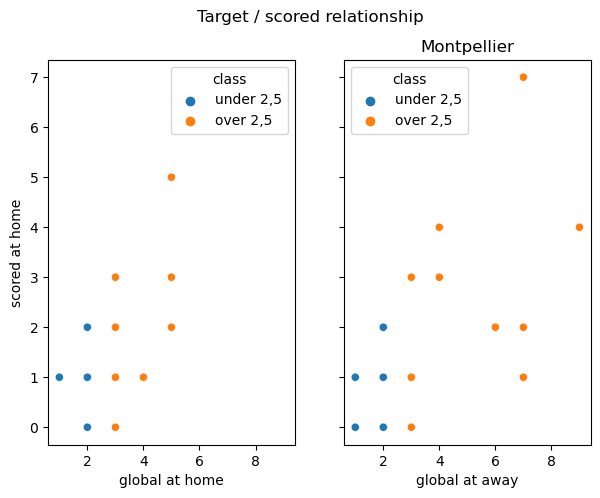

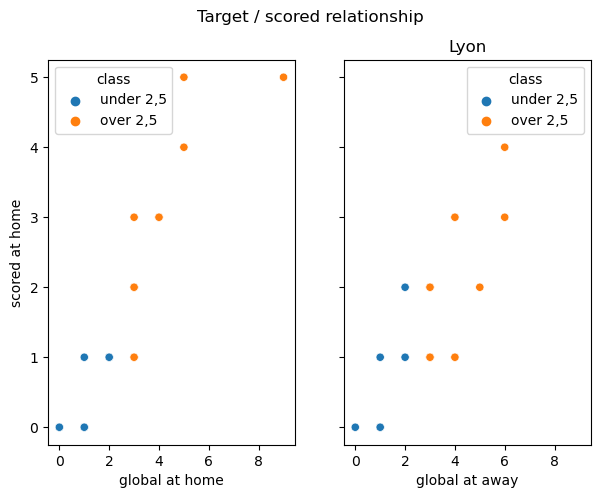

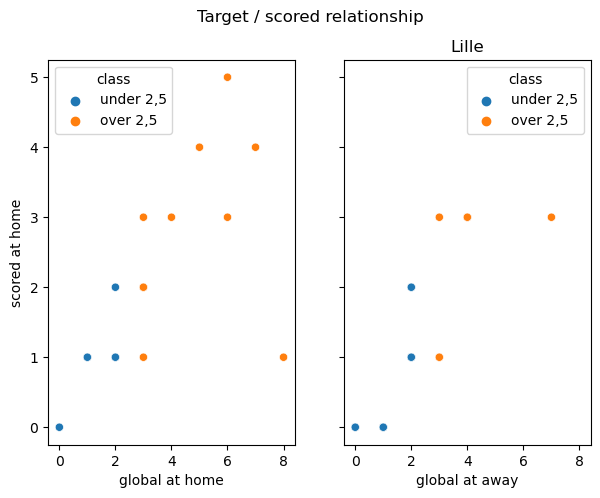

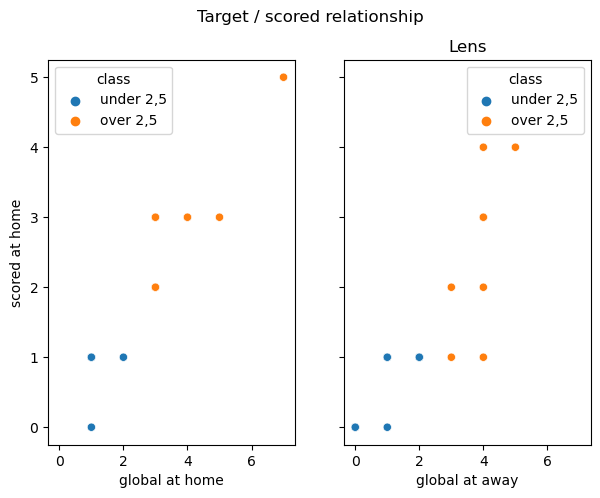

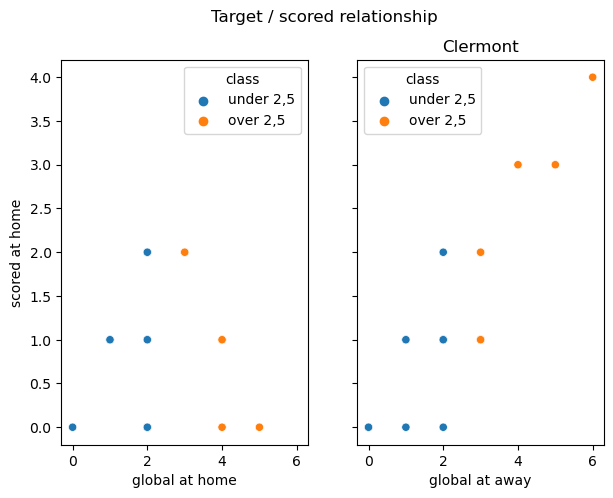

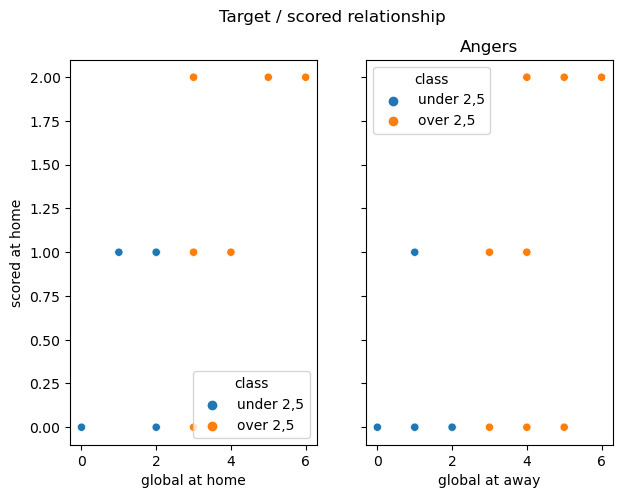

In [19]:
for team in df.home_team.unique():
    rel_feature(team, feature='scored')

#### [ Target | Conceded ]

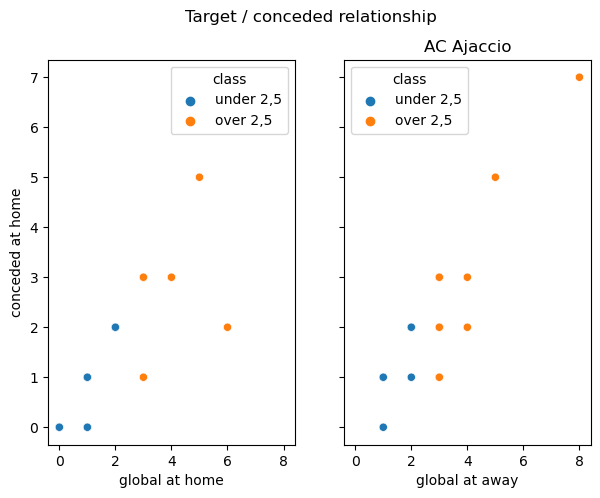

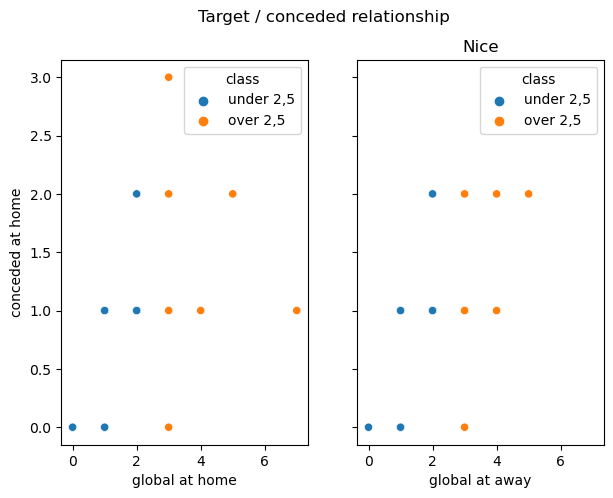

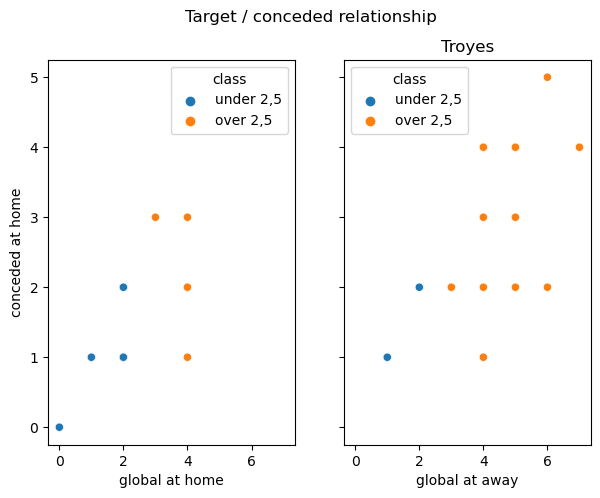

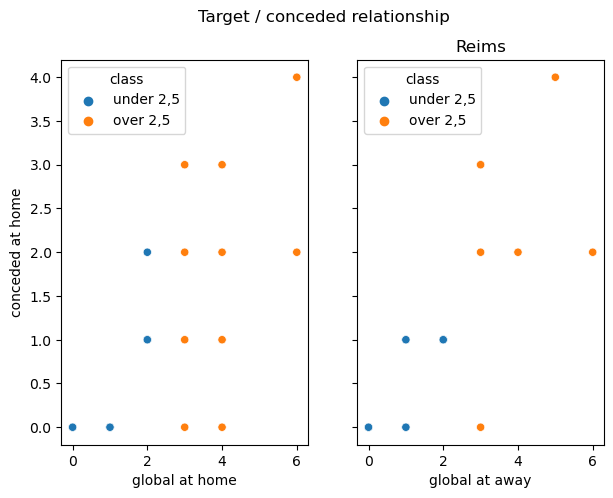

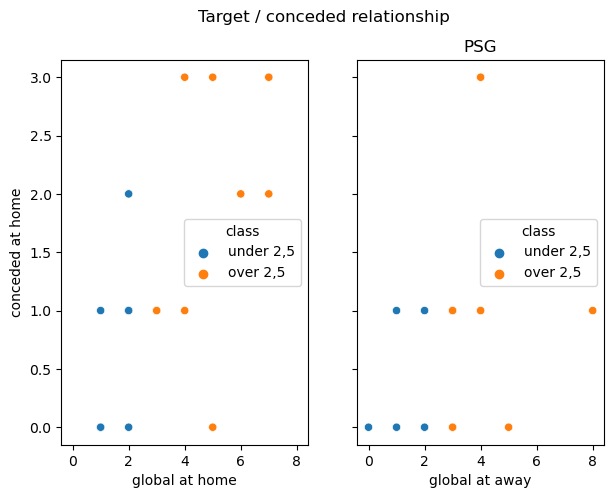

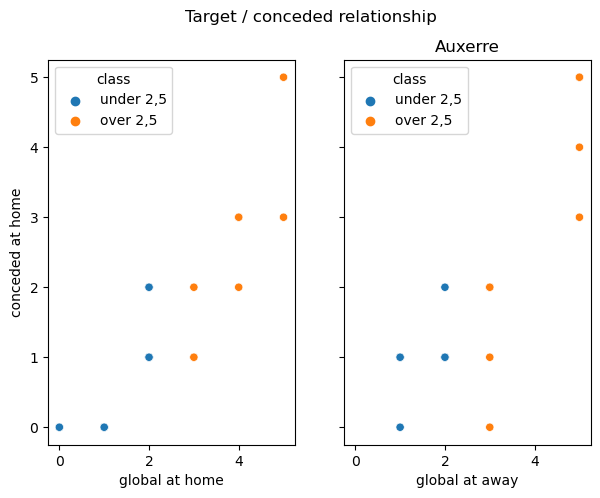

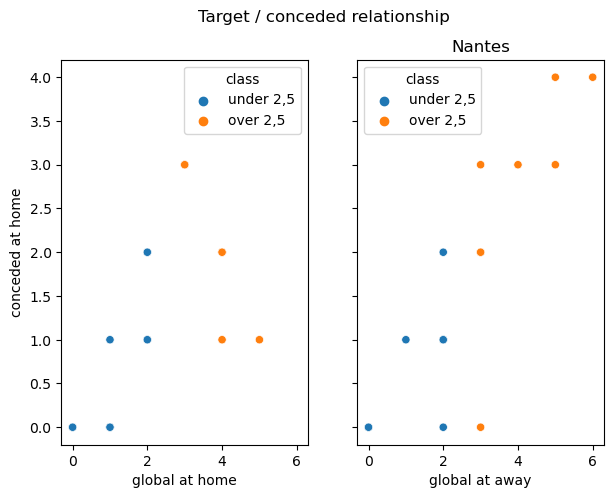

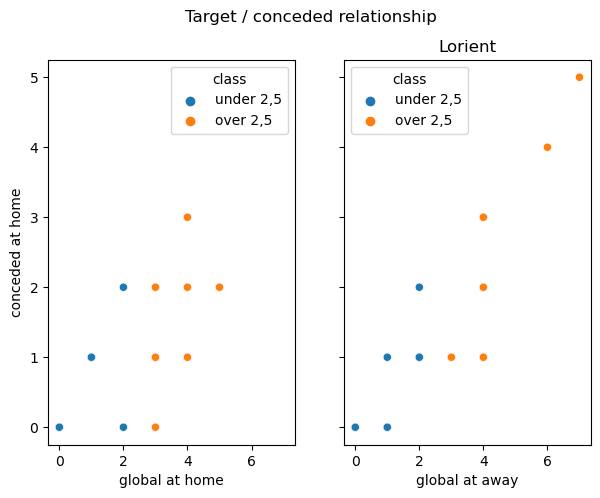

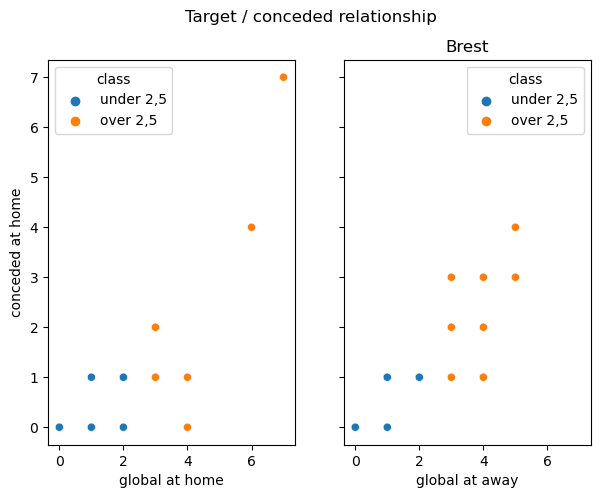

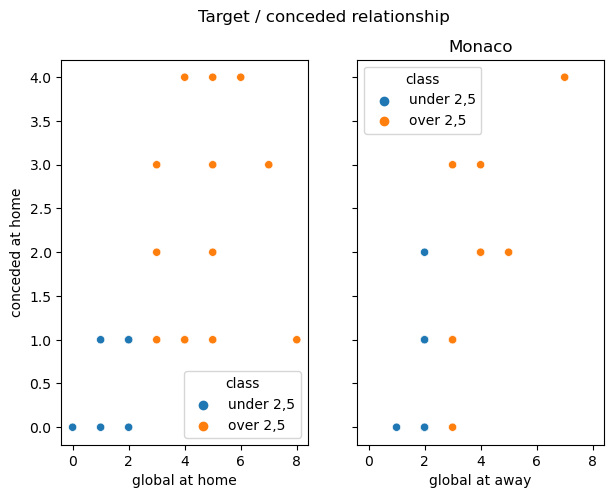

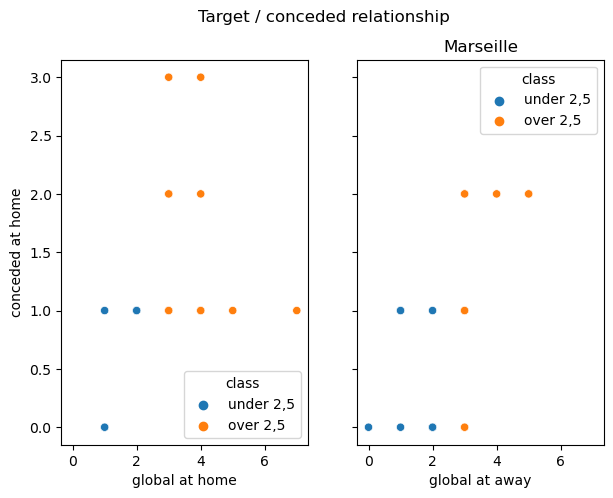

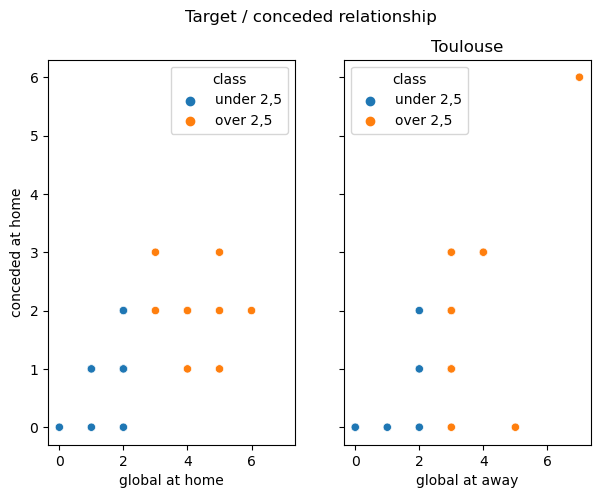

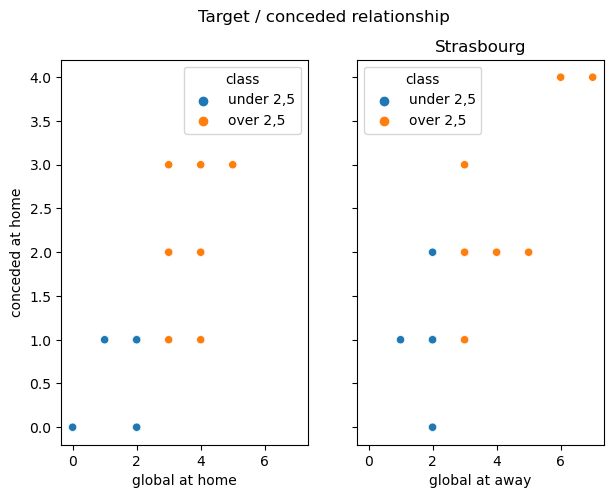

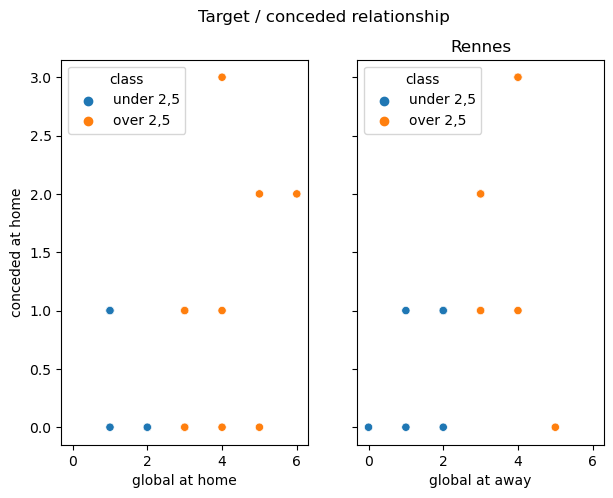

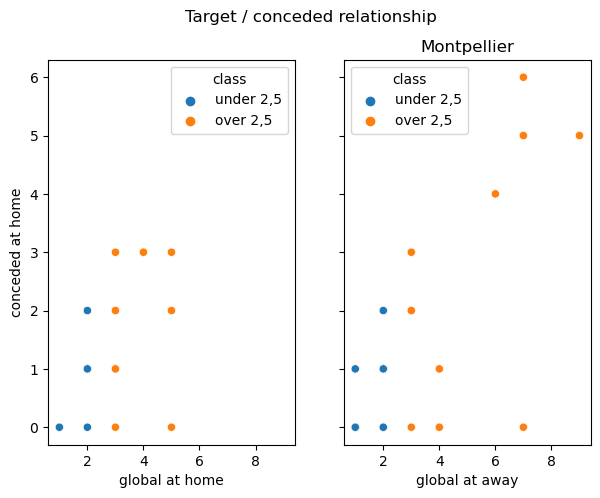

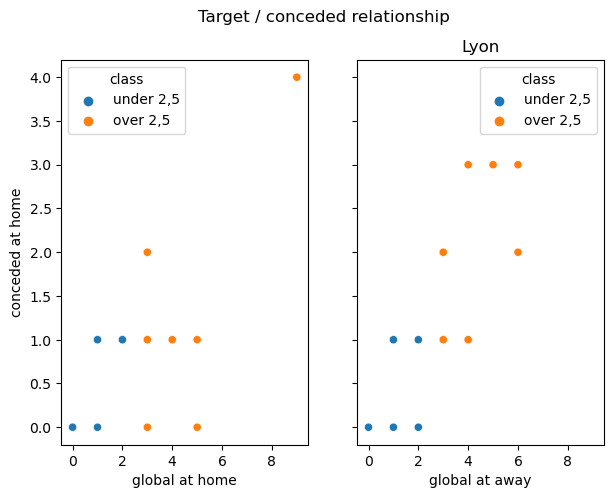

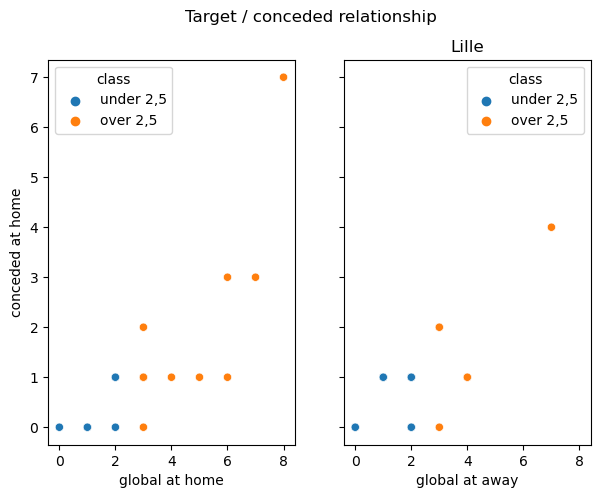

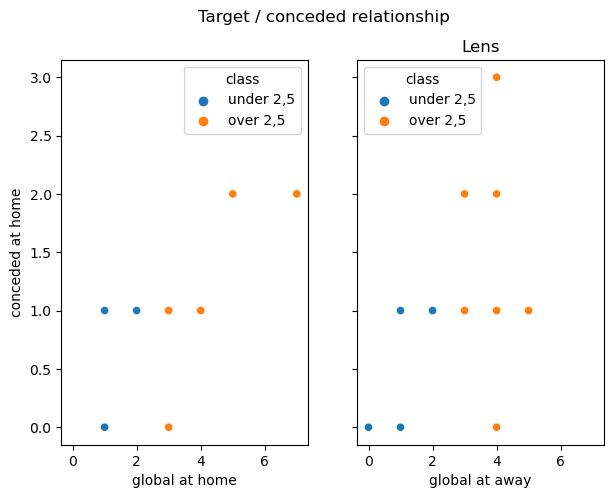

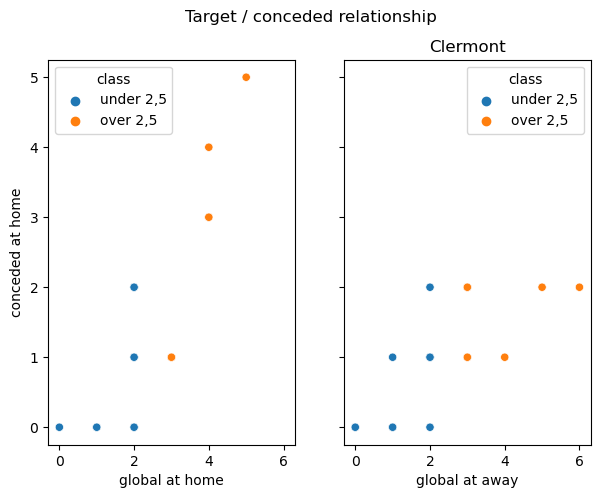

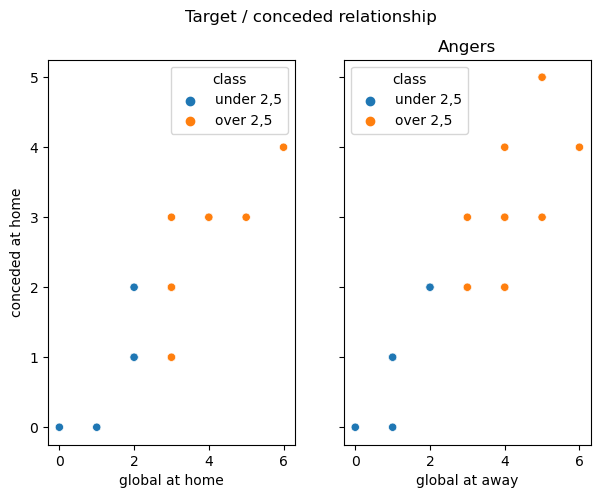

In [20]:
for team in df.home_team.unique():
    rel_feature(team, feature='conceded')

## Feature / Feature Relationship
### [lScored / Conceded ]

In [21]:
def rel_ff(team):
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7,5))
    sns.scatterplot(data=home, x=home['home_team_scored'], y=home['home_team_conceded'], ax=axs[0],
                    hue=home['class'])
    axs[0].set_xlabel('scored at home')
    axs[0].set_ylabel('conceded at home')
    sns.scatterplot(data=away, x=away['away_team_scored'], y=away['away_team_conceded'], ax=axs[1],
                    hue=away['class'])
    axs[1].set_xlabel('scored at away')
    axs[1].set_ylabel('conceded at away')
    plt.suptitle(team)
    plt.show()

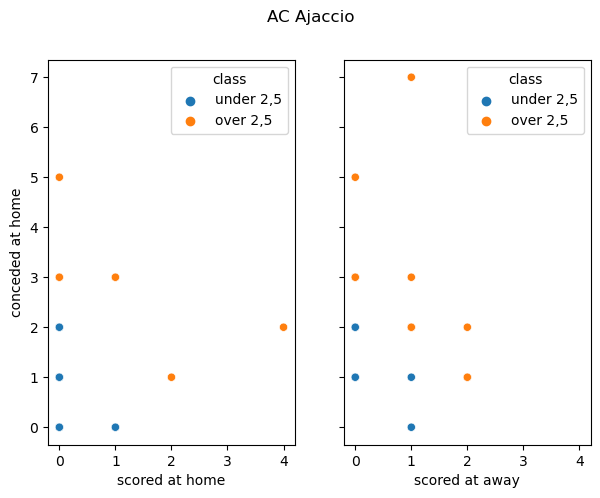

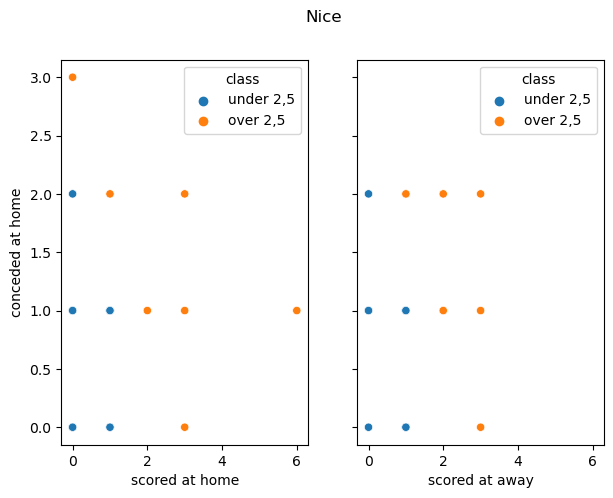

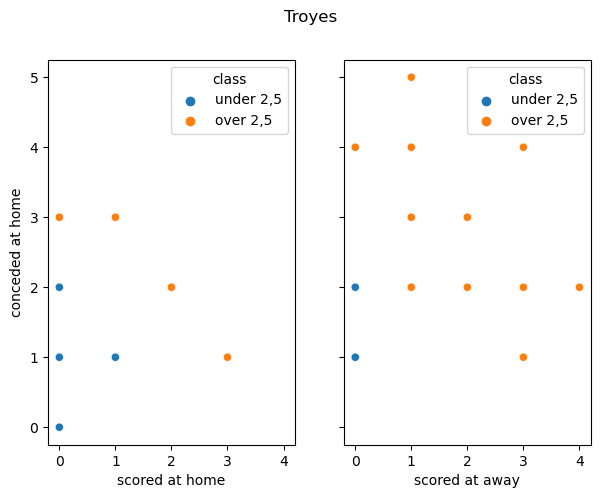

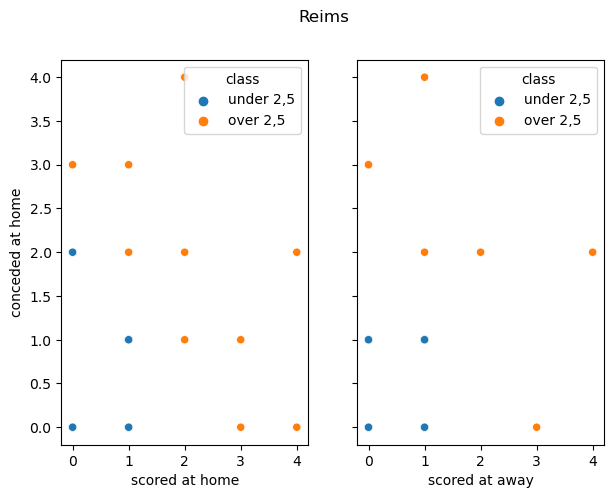

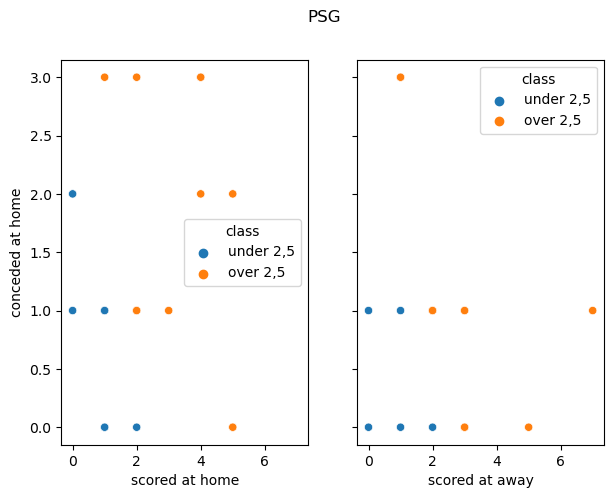

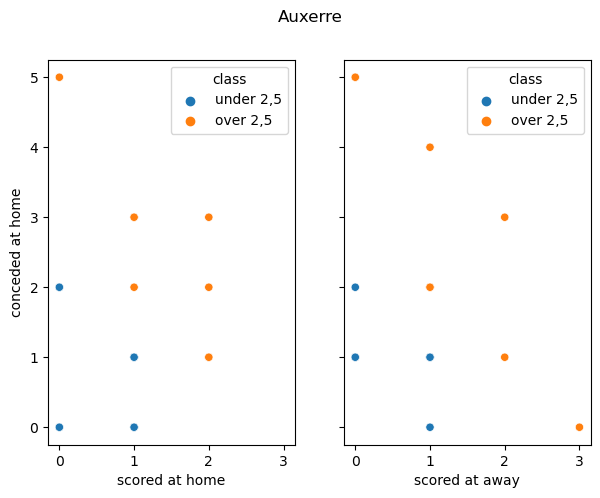

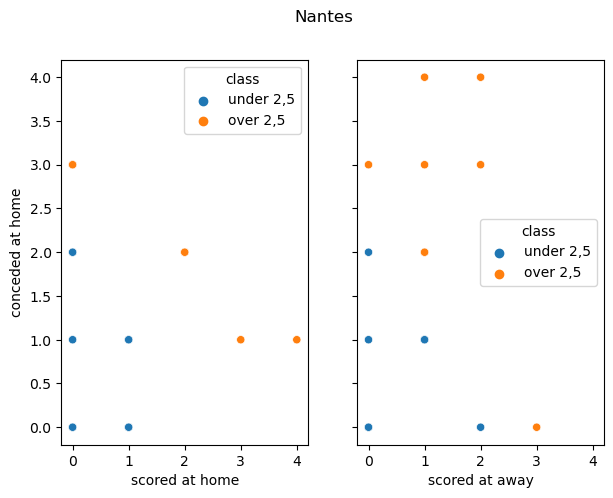

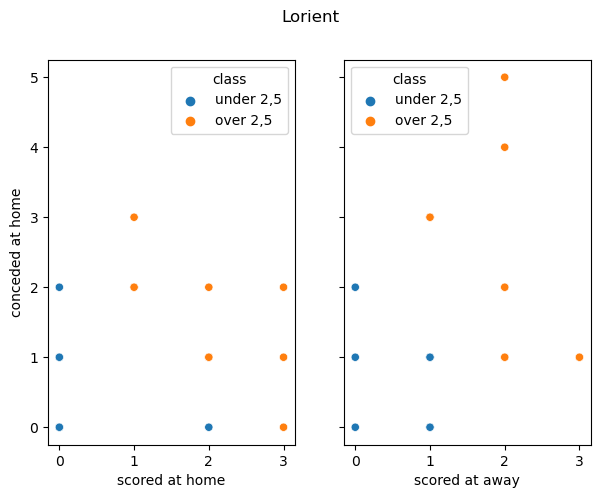

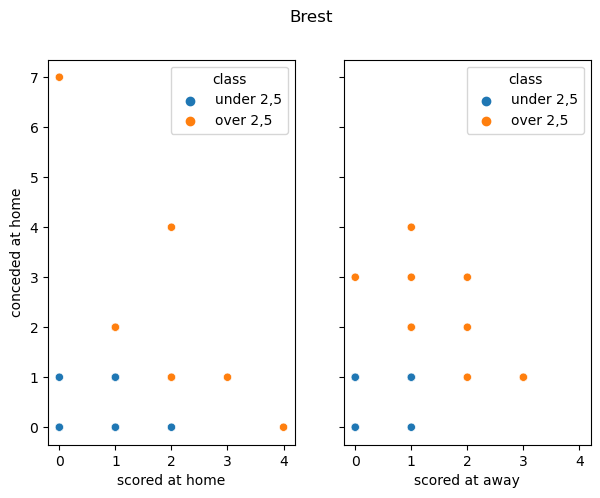

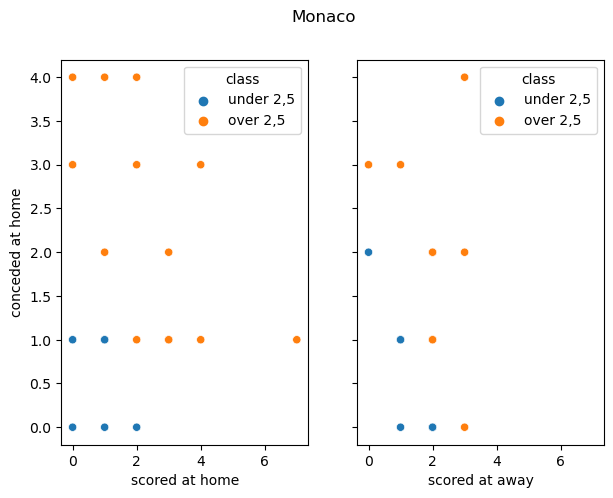

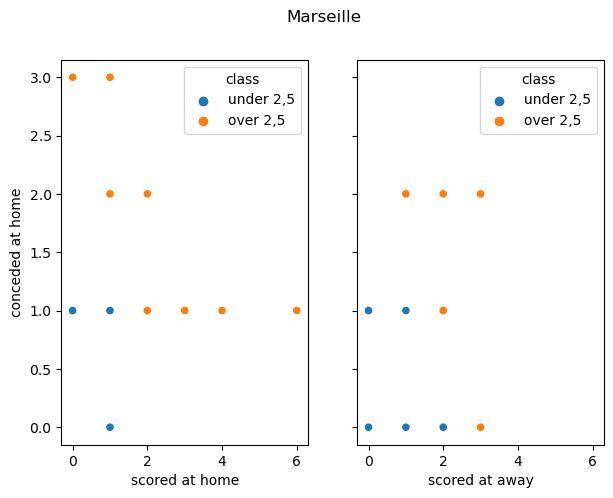

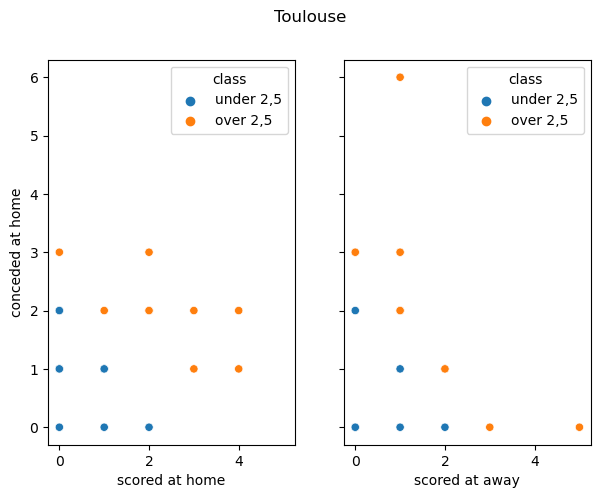

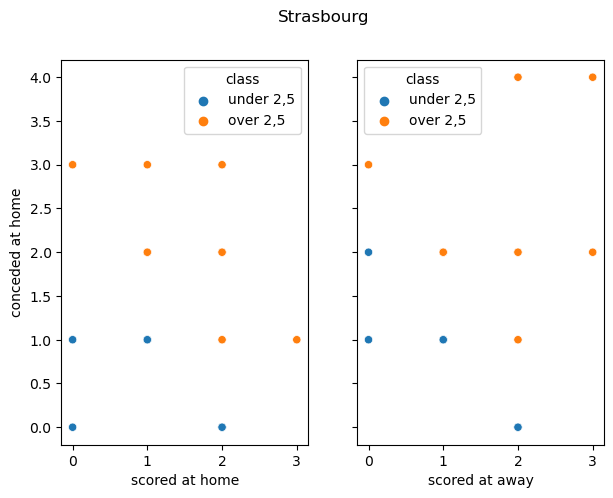

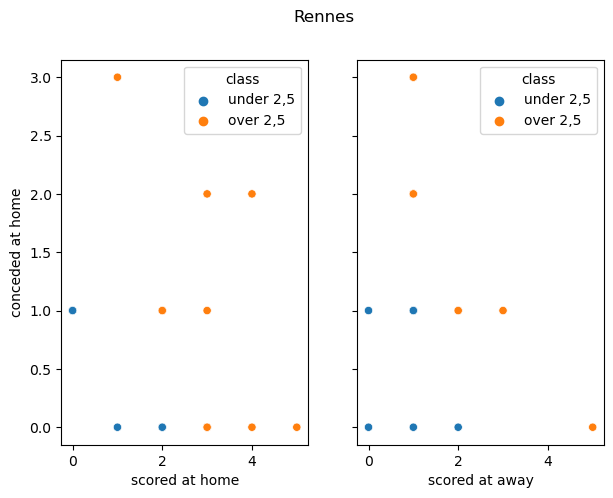

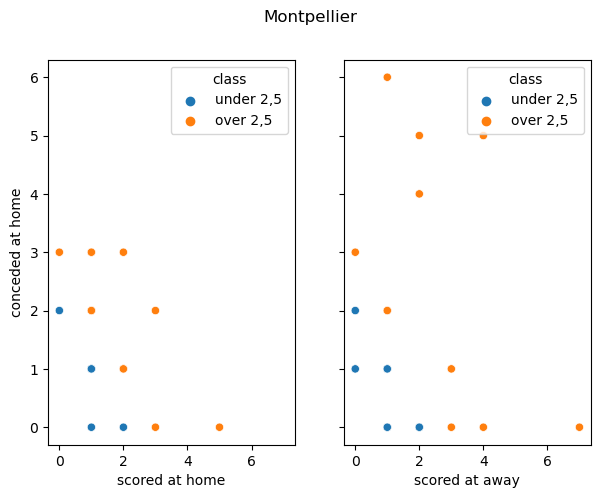

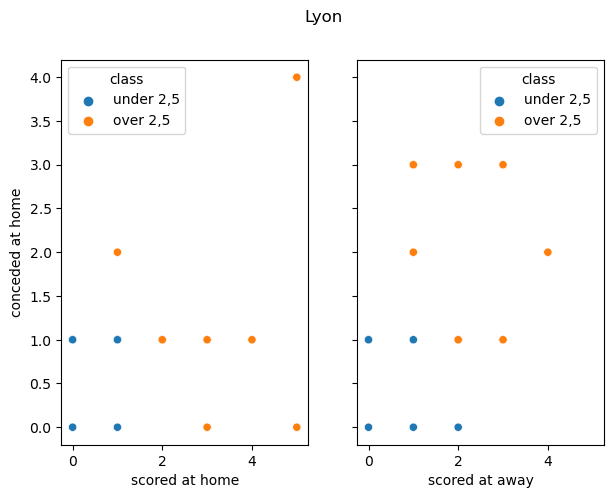

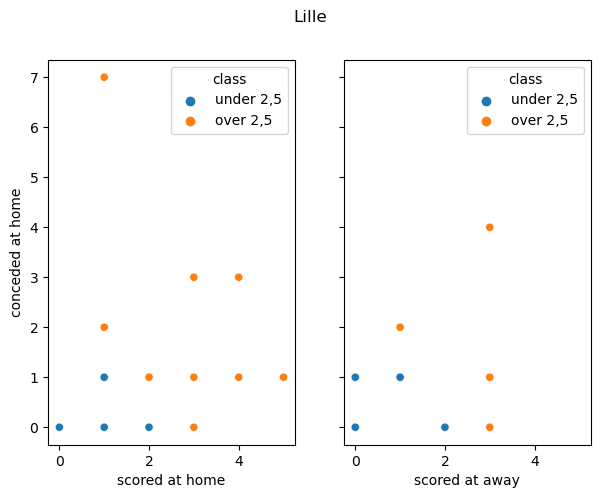

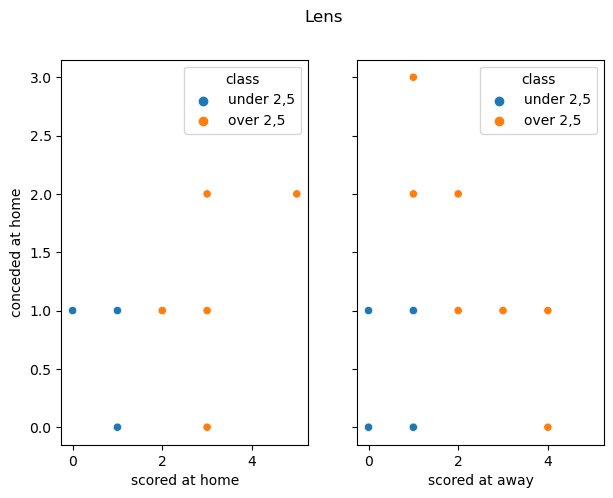

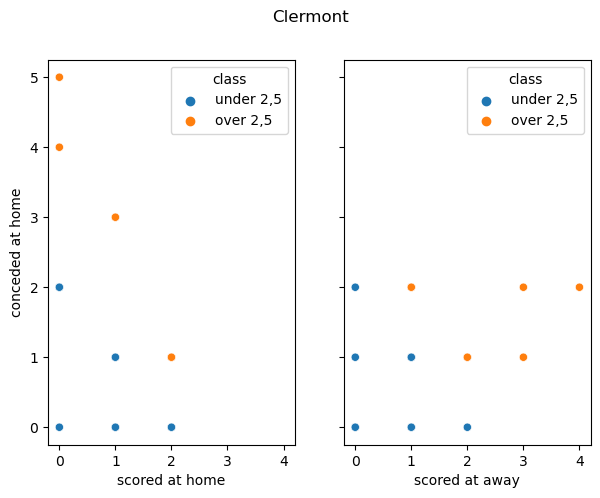

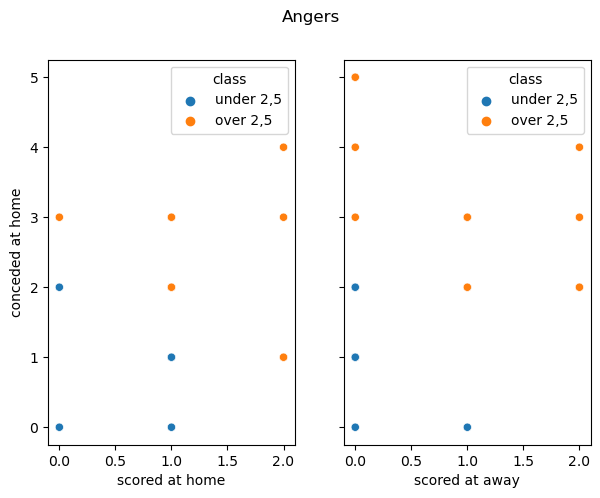

In [22]:
for team in df.home_team.unique():
    rel_ff(team)


### Observation des moyennes (features)

In [23]:
at_home = df.groupby('home_team')[['home_team_scored', 'home_team_conceded']].mean()
at_away = df.groupby('away_team')[['away_team_scored', 'away_team_conceded']].mean()
overall = pd.concat([at_home, at_away], axis=1, ignore_index=False)
overall.columns

Index(['home_team_scored', 'home_team_conceded', 'away_team_scored',
       'away_team_conceded'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

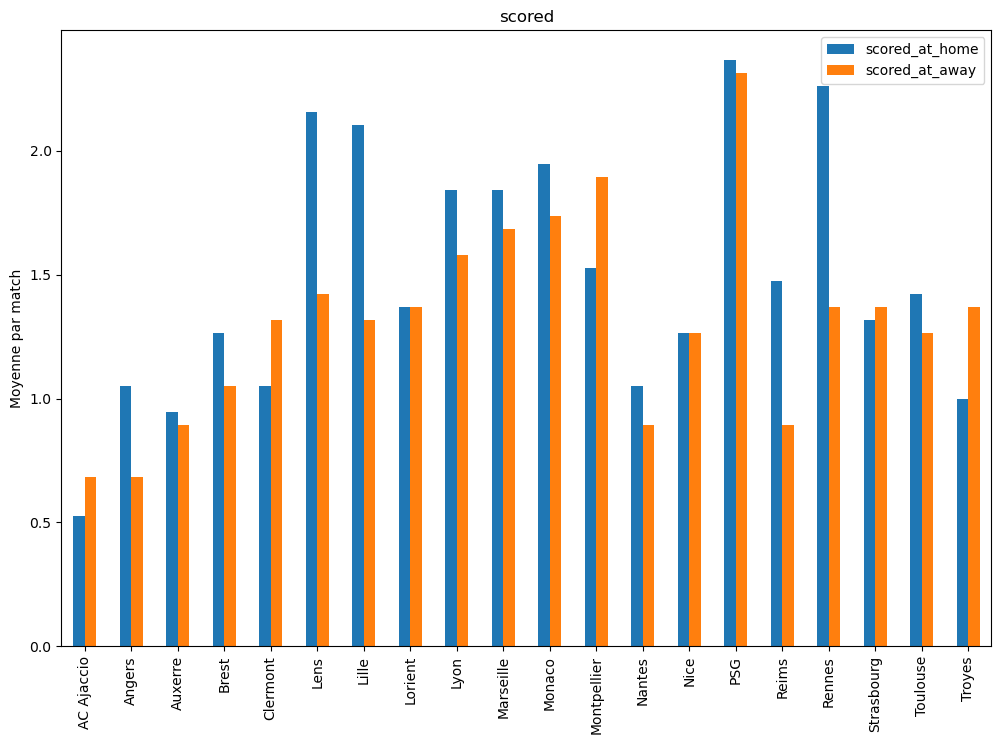

In [24]:
plt.figure()
fig = overall.drop(['home_team_conceded', 'away_team_conceded'],
                   axis=1).rename(columns=({'home_team_scored':'scored_at_home',
                                            'away_team_scored':'scored_at_away'}))
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Moyenne par match')
plt.title('scored')
plt.show()

<Figure size 640x480 with 0 Axes>

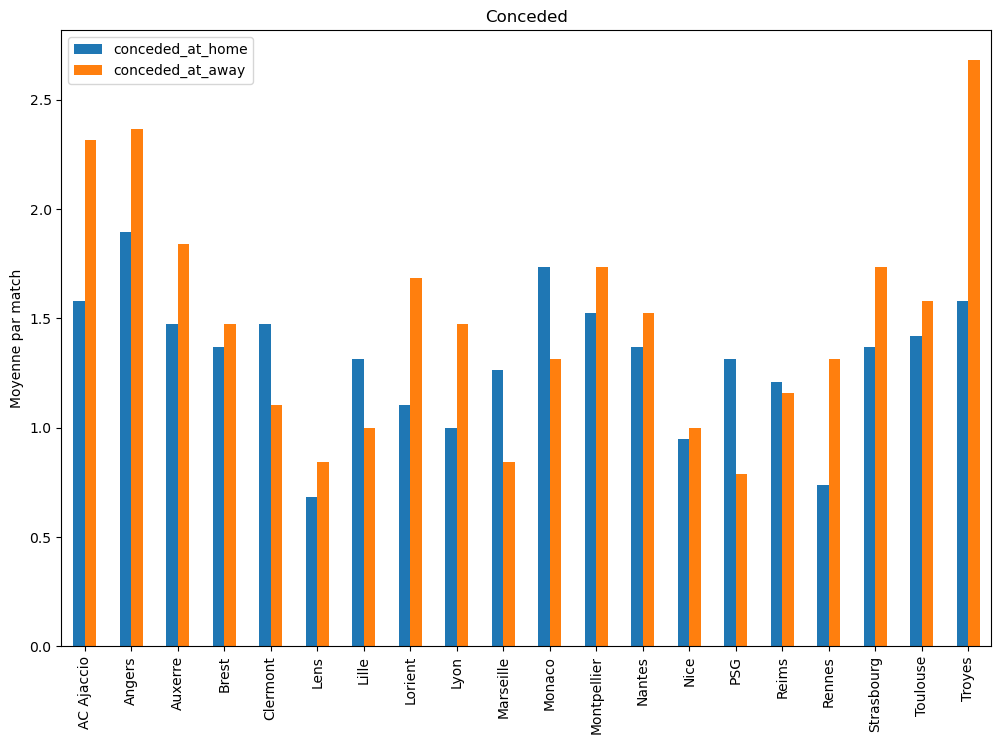

In [25]:
plt.figure()
fig = overall.drop(['home_team_scored', 'away_team_scored'],
                   axis=1).rename(columns=({'home_team_conceded':'conceded_at_home',
                                            'away_team_conceded':'conceded_at_away'}))
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Moyenne par match')
plt.title('Conceded')
plt.show()

### Subsets creation
* strong attack / strong_defense
* weak attack / weak defense
* strong attack / weak defense
* weak attack / strong defense


In [26]:
# At home
strg_attack_ = overall[(overall.home_team_scored > 2)]
bad_defense_ = overall[overall.home_team_conceded > 2]
weak_attack_ = overall[overall.home_team_scored < 1.5]
strg_defense_ = overall[overall.home_team_conceded < 1.5]

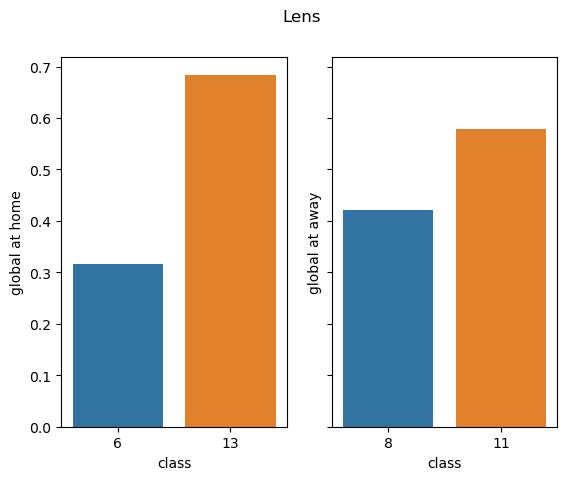

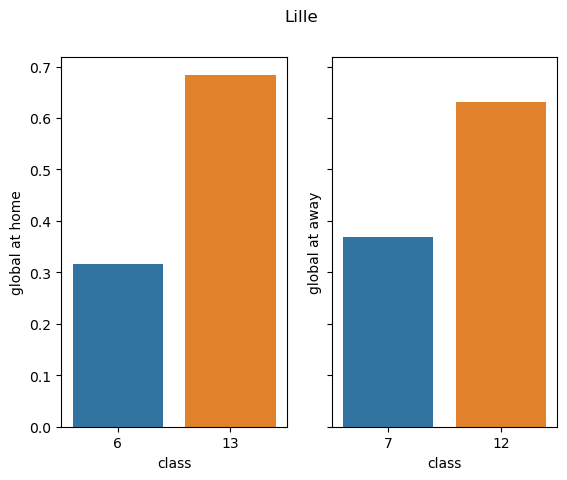

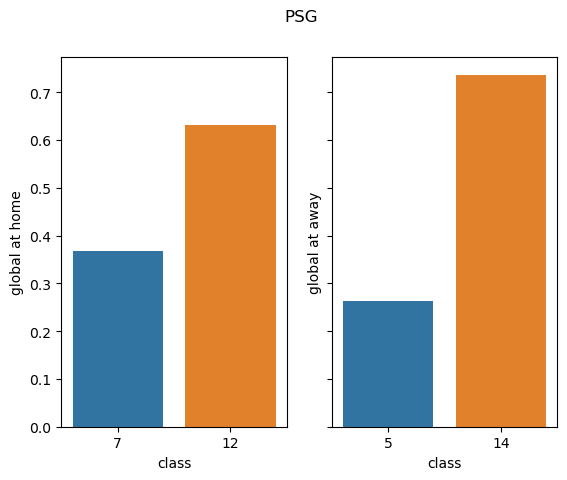

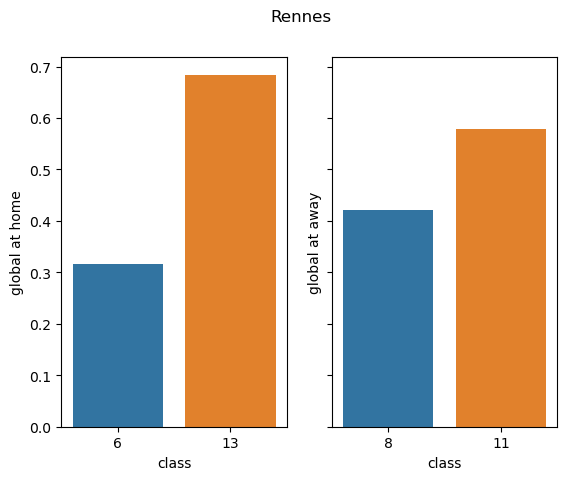

In [27]:
# on vas observer le taux de under / over 
# a domicile et a l'exterieur des groupes
for team in strg_attack_.index:
    df_home = df[df['home_team']==team]
    df_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True)
    sns.barplot(data=df_home, x=df_home['class'].value_counts(), y=df_home['class'].value_counts(normalize=True), ax=axs[0])
    sns.barplot(data=df_away, x=df_away['class'].value_counts(), y=df_away['class'].value_counts(normalize=True), ax=axs[1])
    axs[0].set_ylabel('global at home')
    axs[1].set_ylabel('global at away')
    plt.suptitle(team)
    plt.show()

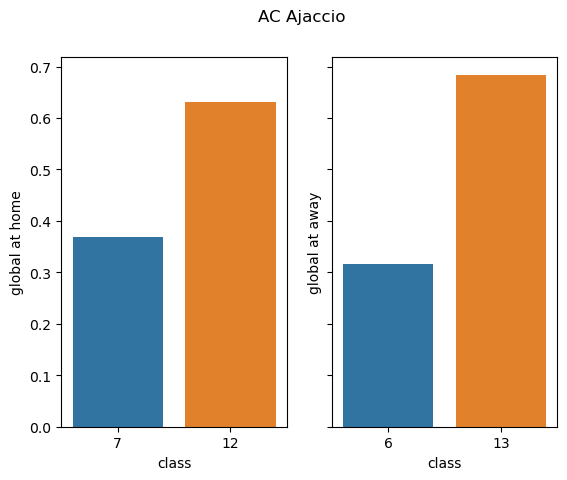

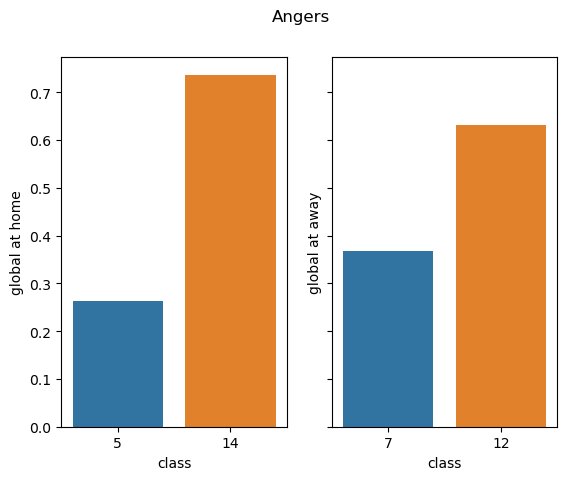

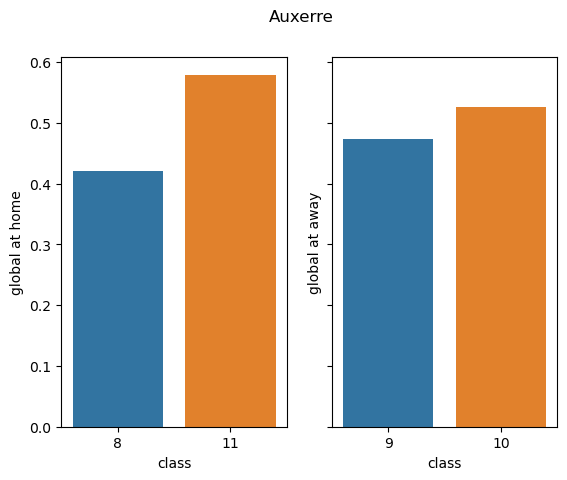

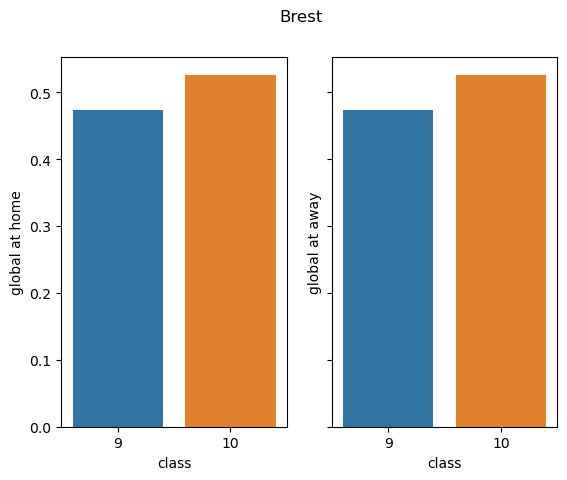

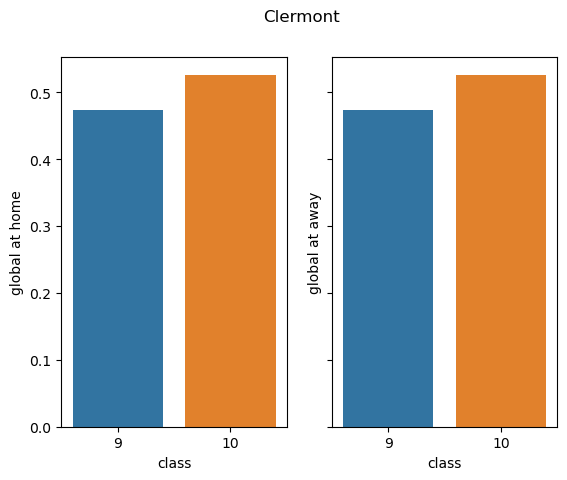

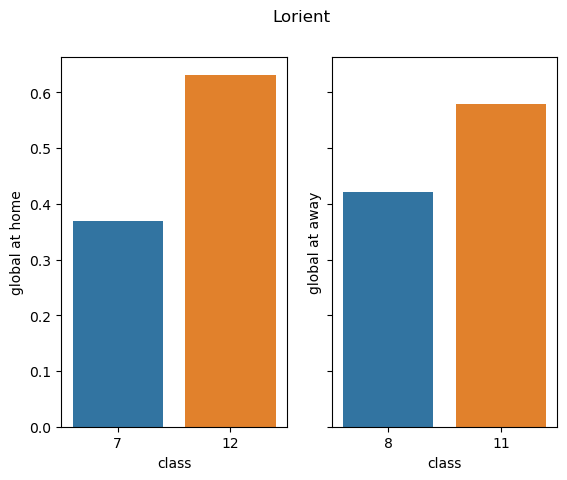

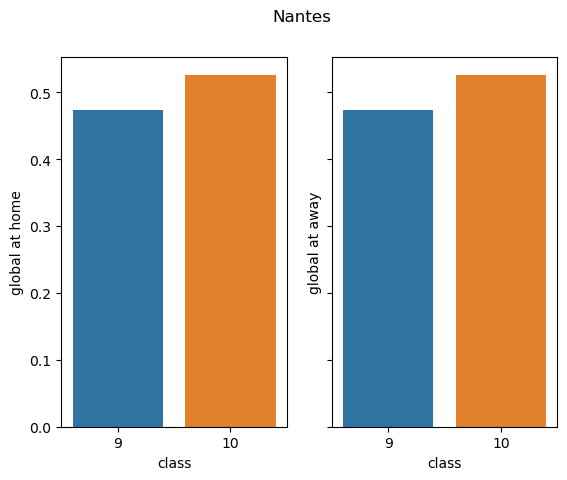

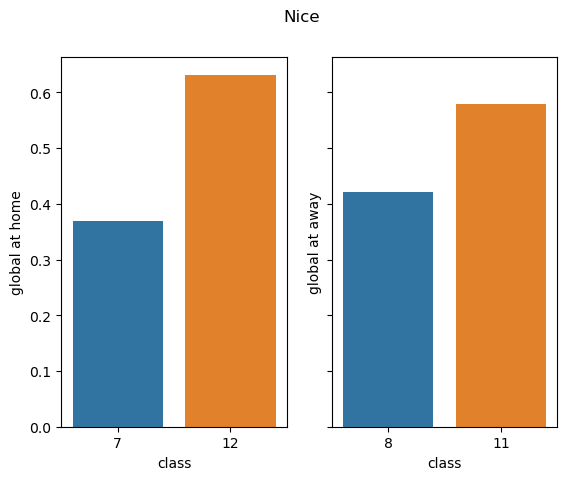

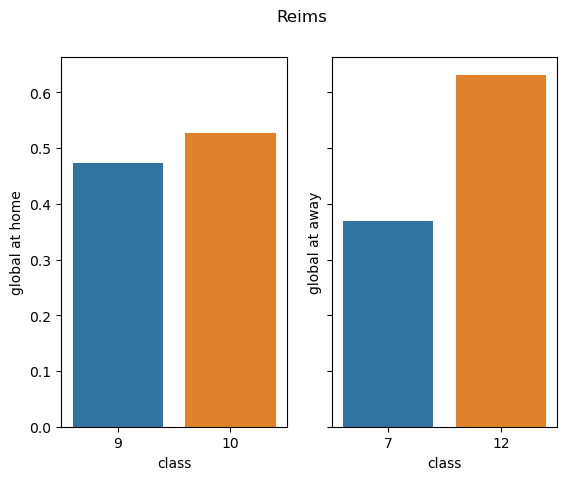

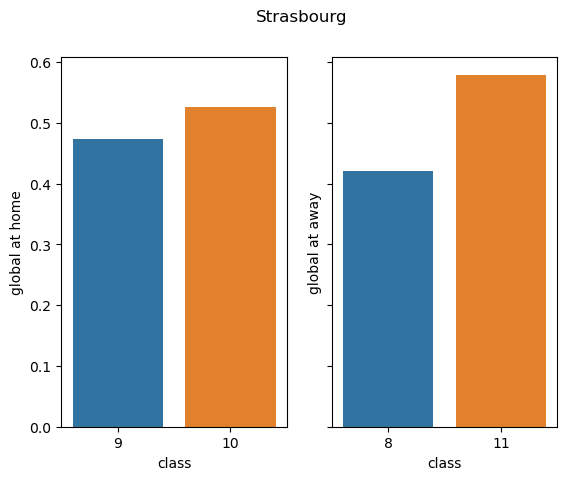

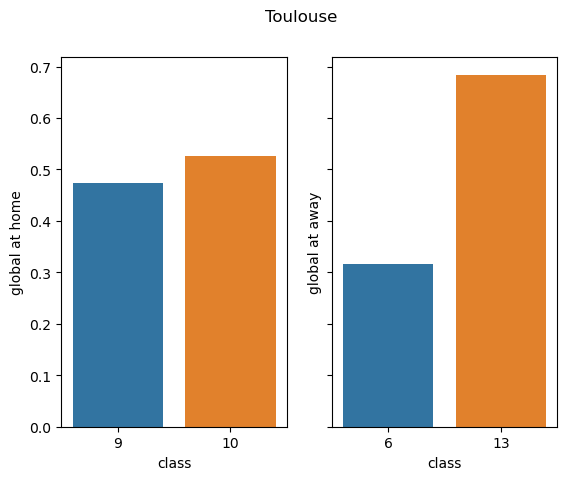

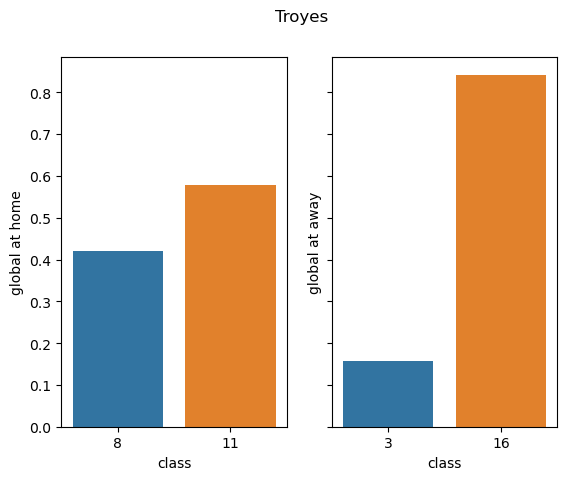

In [28]:

for team in weak_attack_.index:
    df_home = df[df['home_team']==team]
    df_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True)
    sns.barplot(data=df_home, x=df_home['class'].value_counts(), y=df_home['class'].value_counts(normalize=True), ax=axs[0])
    sns.barplot(data=df_away, x=df_away['class'].value_counts(), y=df_away['class'].value_counts(normalize=True), ax=axs[1])
    axs[0].set_ylabel('global at home')
    axs[1].set_ylabel('global at away')
    plt.suptitle(team)
    plt.show()

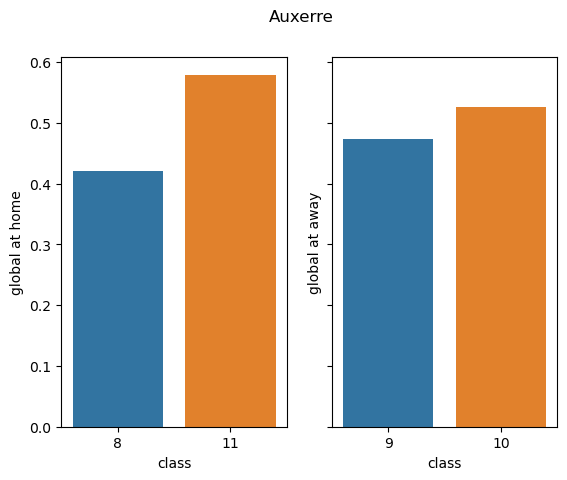

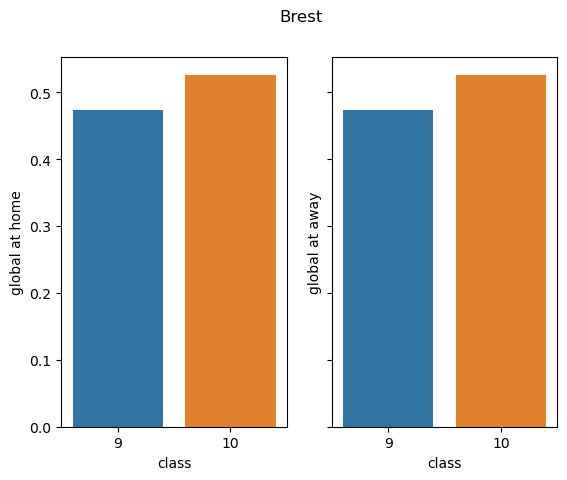

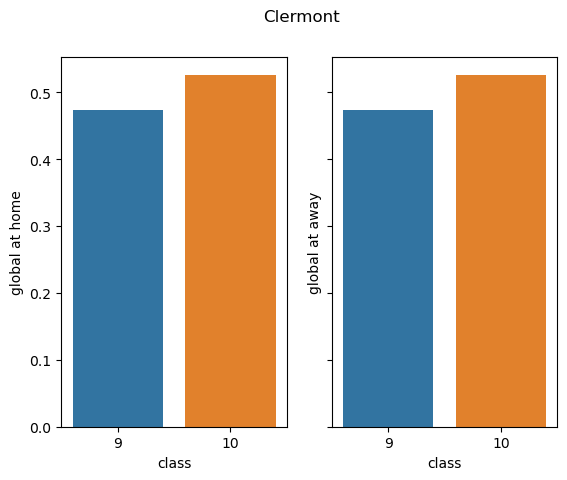

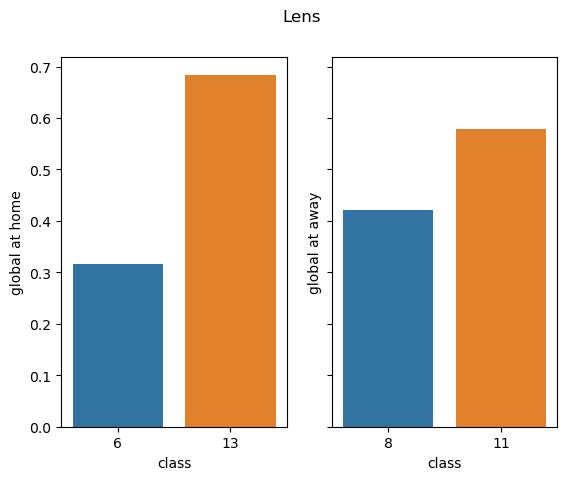

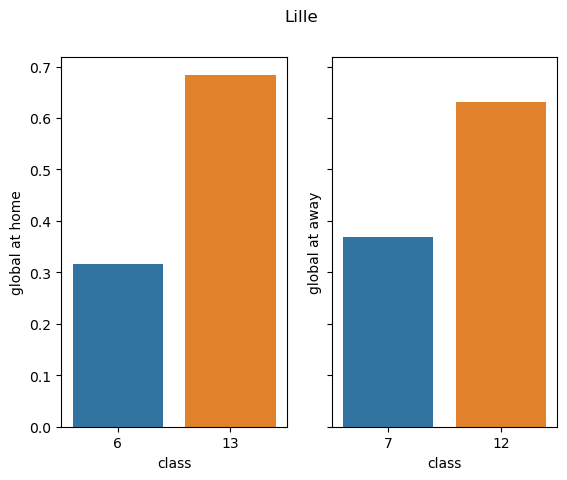

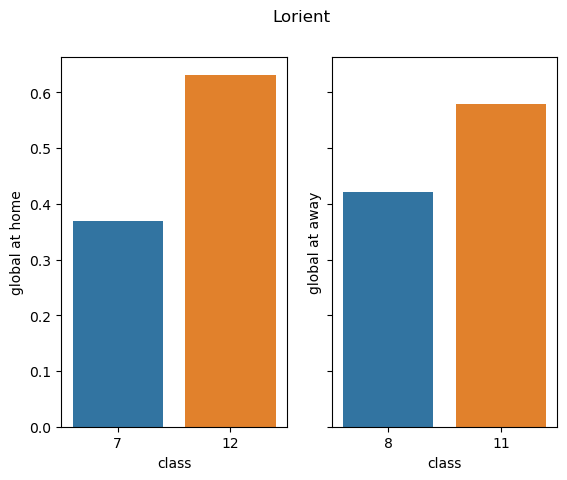

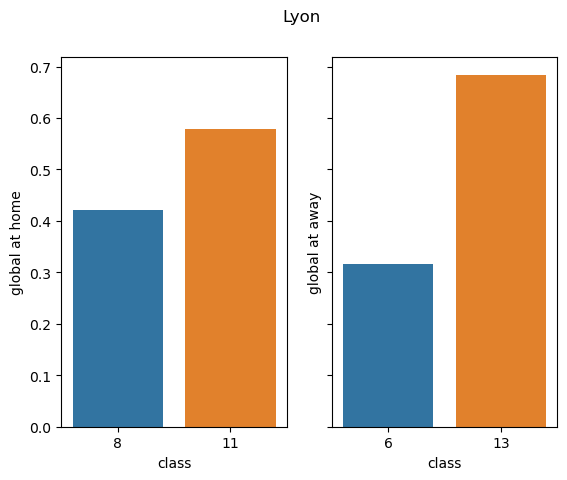

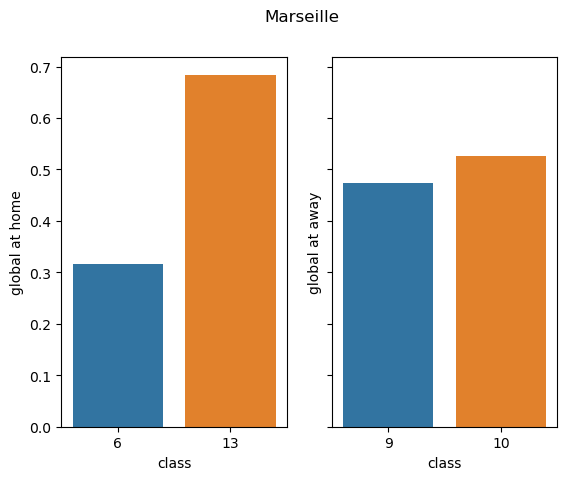

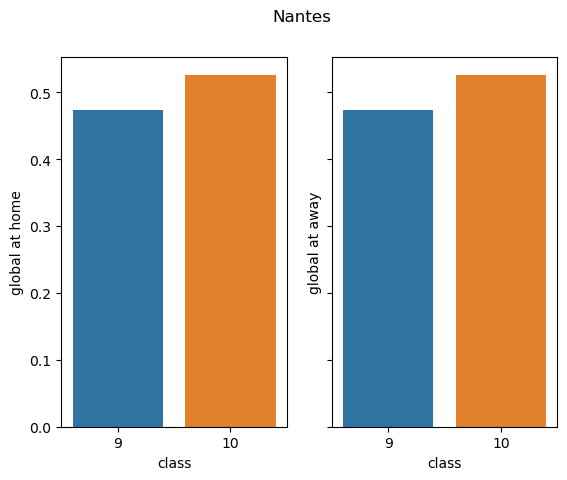

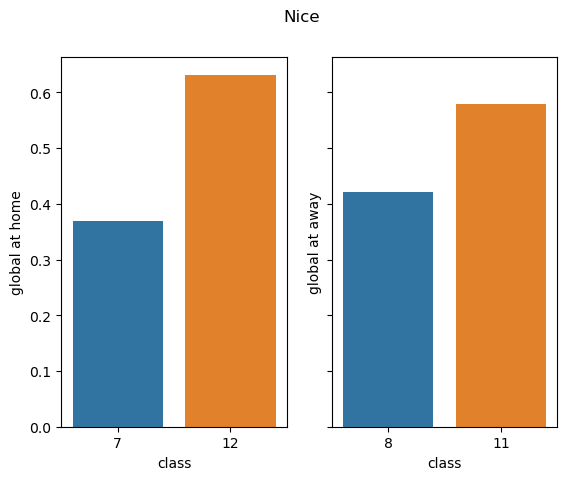

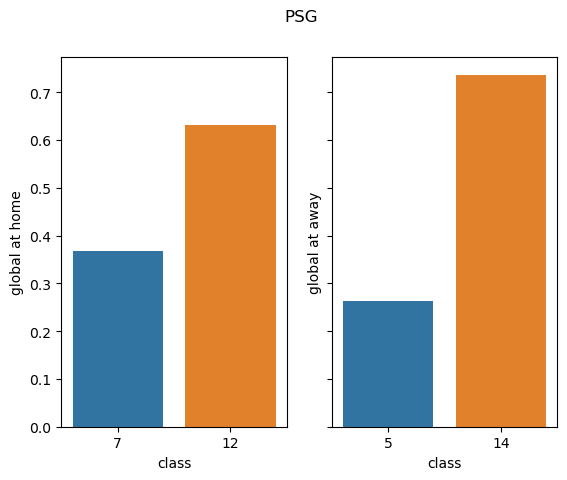

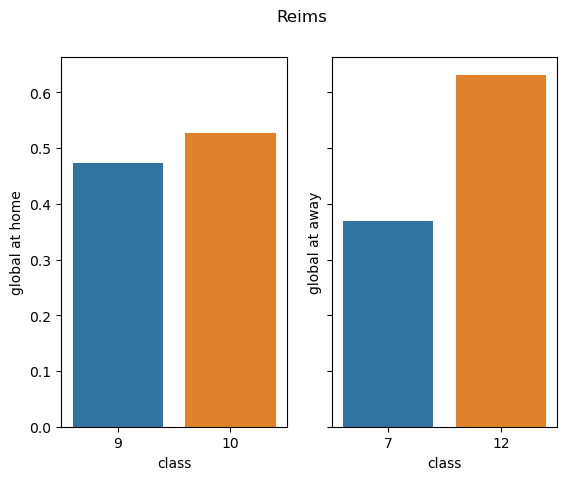

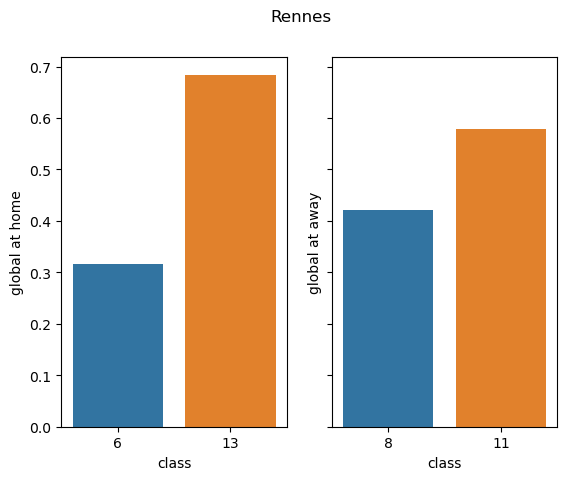

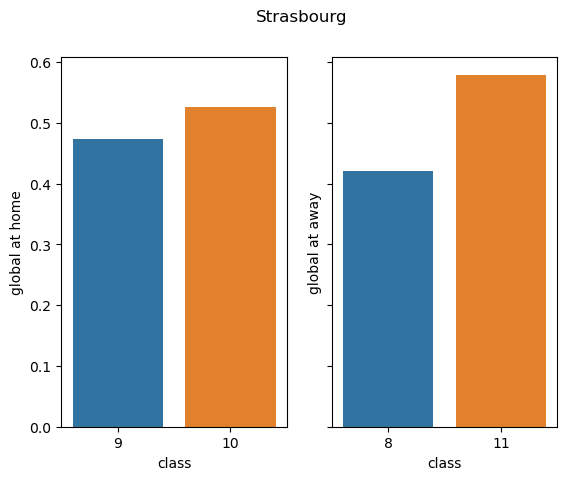

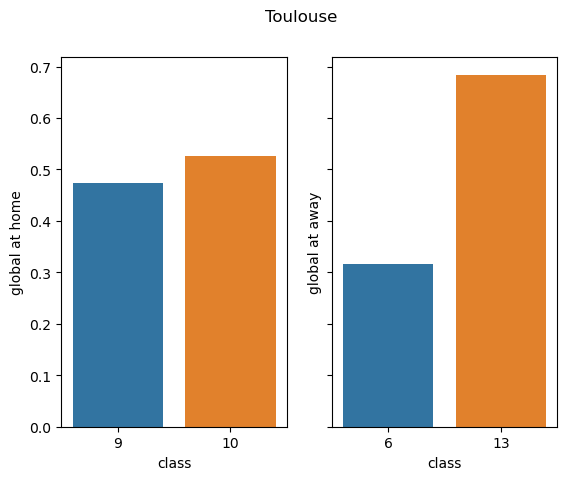

In [29]:

for team in strg_defense_.index:
    df_home = df[df['home_team']==team]
    df_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True)
    sns.barplot(data=df_home, x=df_home['class'].value_counts(), y=df_home['class'].value_counts(normalize=True), ax=axs[0])
    sns.barplot(data=df_away, x=df_away['class'].value_counts(), y=df_away['class'].value_counts(normalize=True), ax=axs[1])
    axs[0].set_ylabel('global at home')
    axs[1].set_ylabel('global at away')
    plt.suptitle(team)
    plt.show()

### Interpretation
We see, there's little difference between the groups (strong attack and bad defense...),\
'over' class is generally higher than 'under'.\
But for some reason, teams with low scored and conceded average (lt 1.5) are their class (under / over) more balanced.

### Correlation 
It seems like the average of goal influence the results,\
We will see the correlation between them and the target

In [30]:
path = Path.cwd().parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df2 = pd.read_csv(path, parse_dates=True, index_col='date_time')
df2.head()

journée   home_team    away_team  1st_home_team_goal  \
date_time                                                                   
2023-06-03 19:00:00       38  AC Ajaccio    Marseille                   0   
2023-06-03 19:00:00       38        Nice         Lyon                   3   
2023-06-03 19:00:00       38      Troyes        Lille                   0   
2023-06-03 19:00:00       38       Reims  Montpellier                   1   
2023-06-03 19:00:00       38         PSG     Clermont                   2   

                     1st_away_team_goal  1st_total_goal  2nd_home_team_goal  \
date_time                                                                     
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   1               4                   0   
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   0               1                   0   
2023-06-03 19:00:00                   2               4                   0   

                     2nd_away_team_goal  2nd_total_goal  total_home_team_goal  \
date_time                                                                       
2023-06-03 19:00:00                   0               1                     1   
2023-06-03 19:00:00                   0               0                     3   
2023-06-03 19:00:00                   1               2                     1   
2023-06-03 19:00:00                   3               3                     1   
2023-06-03 19:00:00                   1               1                     2   

                     total_away_team_goal  global  
date_time                                          
2023-06-03 19:00:00                     0       1  
2023-06-03 19:00:00                     1       4  
2023-06-03 19:00:00                     1       2  
2023-06-03 19:00:00                     3       4  
2023-06-03 19:00:00                     3       5

### Feature Engineering

In [31]:

def avg_per_match():
    """This function will calculate for each team
    the average of goal scored and conceded after each journée
    """
    data = df2.copy()
    data = data.sort_values(by='journée', ascending=True)
    for row in data.iterrows():
        at_home = data[data['home_team']==data['home_team']]
        at_away = data[data['away_team']==data['away_team']]
        data['ht_scored_avg'] = at_home.groupby('home_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_conceded_avg'] = at_home.groupby('home_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_scored_avg'] = at_away.groupby('away_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_conceded_avg'] = at_away.groupby('away_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_global_avg'] = at_home.groupby('home_team')['global'].transform(lambda x: x.expanding().mean().shift())
        data['at_global_avg'] = at_away.groupby('away_team')['global'].transform(lambda x: x.expanding().mean().shift())
        data['ht_scored_avg5'] = at_home.groupby('home_team')['total_home_team_goal'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
        data['ht_conceded_avg5'] = at_home.groupby('home_team')['total_away_team_goal'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
        data['at_scored_avg5'] = at_away.groupby('away_team')['total_away_team_goal'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
        data['at_conceded_avg5'] = at_away.groupby('away_team')['total_home_team_goal'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
        data['ht_global_avg5'] = at_home.groupby('home_team')['global'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
        data['at_global_avg5'] = at_away.groupby('away_team')['global'].transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean())
    return data

In [32]:
data = avg_per_match()

In [33]:
data.tail()

journée   home_team    away_team  1st_home_team_goal  \
date_time                                                                   
2023-06-03 19:00:00       38         PSG     Clermont                   2   
2023-06-03 19:00:00       38       Reims  Montpellier                   1   
2023-06-03 19:00:00       38      Troyes        Lille                   0   
2023-06-03 19:00:00       38        Nice         Lyon                   3   
2023-06-03 19:00:00       38  AC Ajaccio    Marseille                   0   

                     1st_away_team_goal  1st_total_goal  2nd_home_team_goal  \
date_time                                                                     
2023-06-03 19:00:00                   2               4                   0   
2023-06-03 19:00:00                   0               1                   0   
2023-06-03 19:00:00                   0               0                   1   
2023-06-03 19:00:00                   1               4                   0   
2023-06-03 19:00:00                   0               0                   1   

                     2nd_away_team_goal  2nd_total_goal  total_home_team_goal  \
date_time                                                                       
2023-06-03 19:00:00                   1               1                     2   
2023-06-03 19:00:00                   3               3                     1   
2023-06-03 19:00:00                   1               2                     1   
2023-06-03 19:00:00                   0               0                     3   
2023-06-03 19:00:00                   0               1                     1   

                     ...  at_scored_avg  at_conceded_avg  ht_global_avg  \
date_time            ...                                                  
2023-06-03 19:00:00  ...       1.222222         1.055556       3.611111   
2023-06-03 19:00:00  ...       1.833333         1.777778       2.611111   
2023-06-03 19:00:00  ...       1.333333         1.000000       2.611111   
2023-06-03 19:00:00  ...       1.611111         1.388889       2.111111   
2023-06-03 19:00:00  ...       1.777778         0.833333       2.166667   

                     at_global_avg  ht_scored_avg5  ht_conceded_avg5  \
date_time                                                              
2023-06-03 19:00:00       2.277778             1.8               1.4   
2023-06-03 19:00:00       3.611111             1.0               1.4   
2023-06-03 19:00:00       2.333333             0.8               1.8   
2023-06-03 19:00:00       3.000000             0.8               1.2   
2023-06-03 19:00:00       2.611111             0.0               2.0   

                     at_scored_avg5  at_conceded_avg5  ht_global_avg5  \
date_time                                                               
2023-06-03 19:00:00             1.4               1.2             3.2   
2023-06-03 19:00:00             2.6               1.6             2.4   
2023-06-03 19:00:00             0.6               0.6             2.6   
2023-06-03 19:00:00             1.8               1.4             2.0   
2023-06-03 19:00:00             1.2               1.2             2.0   

                     at_global_avg5  
date_time                            
2023-06-03 19:00:00             2.6  
2023-06-03 19:00:00             4.2  
2023-06-03 19:00:00             1.2  
2023-06-03 19:00:00             3.2  
2023-06-03 19:00:00             2.4  

[5 rows x 24 columns]

In [34]:
data.drop(['1st_home_team_goal', '1st_away_team_goal', '1st_total_goal', '2nd_home_team_goal', '2nd_away_team_goal',
           '2nd_total_goal'], axis=1, inplace=True)

In [35]:
data.columns

Index(['journée', 'home_team', 'away_team', 'total_home_team_goal',
       'total_away_team_goal', 'global', 'ht_scored_avg', 'ht_conceded_avg',
       'at_scored_avg', 'at_conceded_avg', 'ht_global_avg', 'at_global_avg',
       'ht_scored_avg5', 'ht_conceded_avg5', 'at_scored_avg5',
       'at_conceded_avg5', 'ht_global_avg5', 'at_global_avg5'],
      dtype='object')

In [36]:
def coor(team):
    at_home = data[(data['home_team']==team)]
    at_home.drop(['journée', 'total_home_team_goal',
                   'total_away_team_goal', 'home_team', 'away_team'], axis=1, inplace=True)
    fig, axs = plt.subplots(figsize=(6,7))
    sns.heatmap(at_home.corr(), annot=True, ax=axs)
    plt.title(team)
    plt.show()


/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


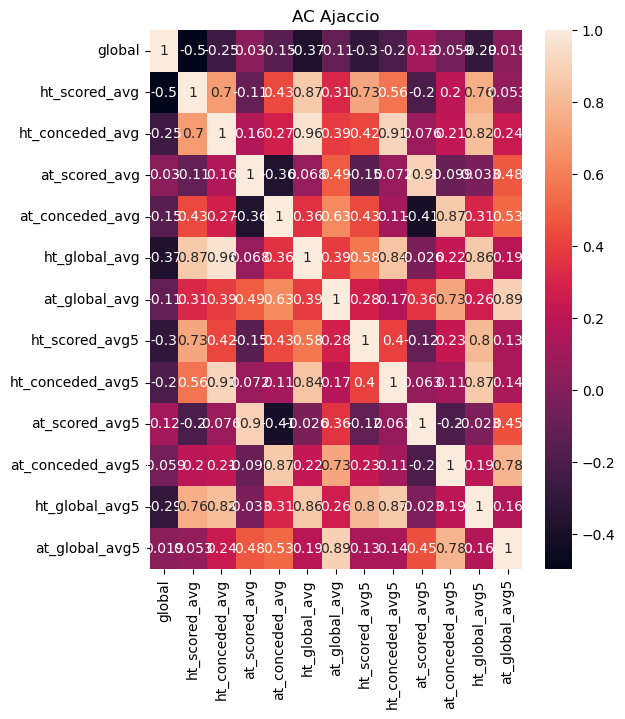

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


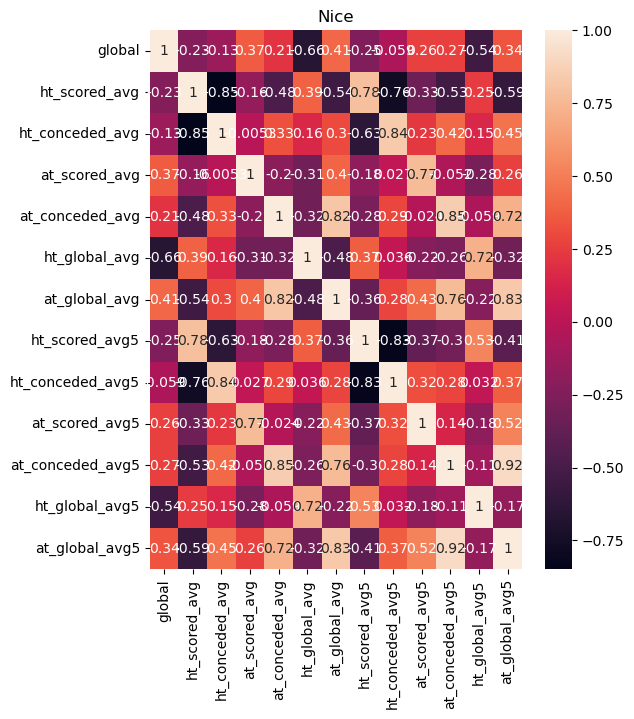

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


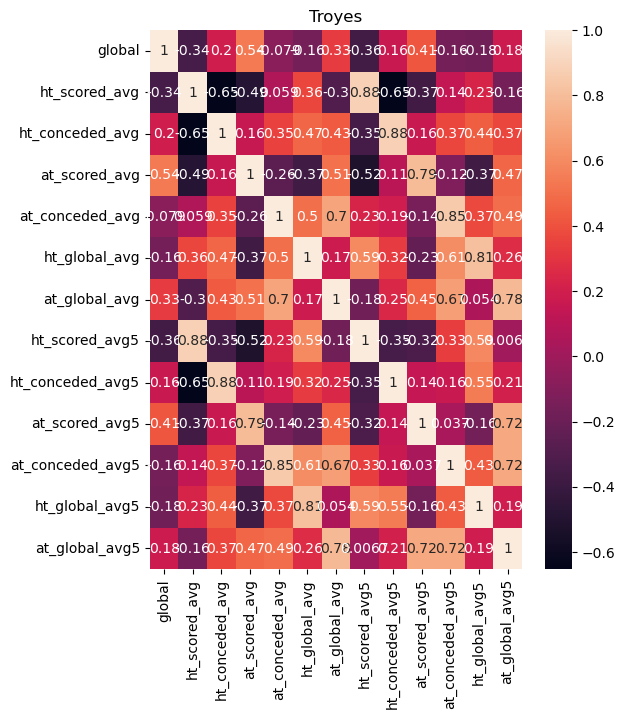

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


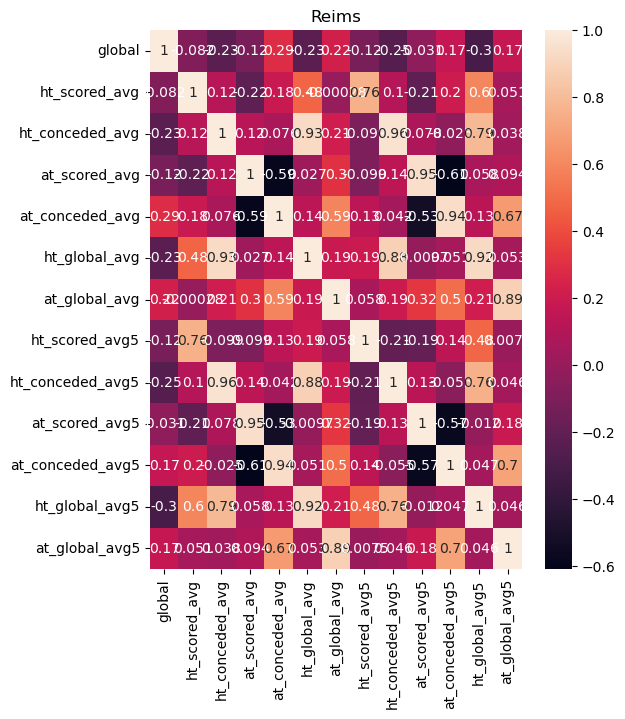

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


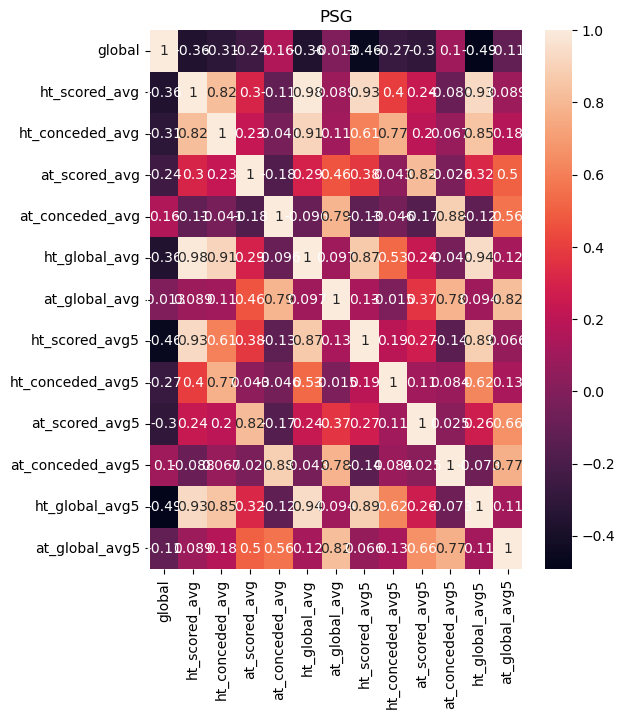

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


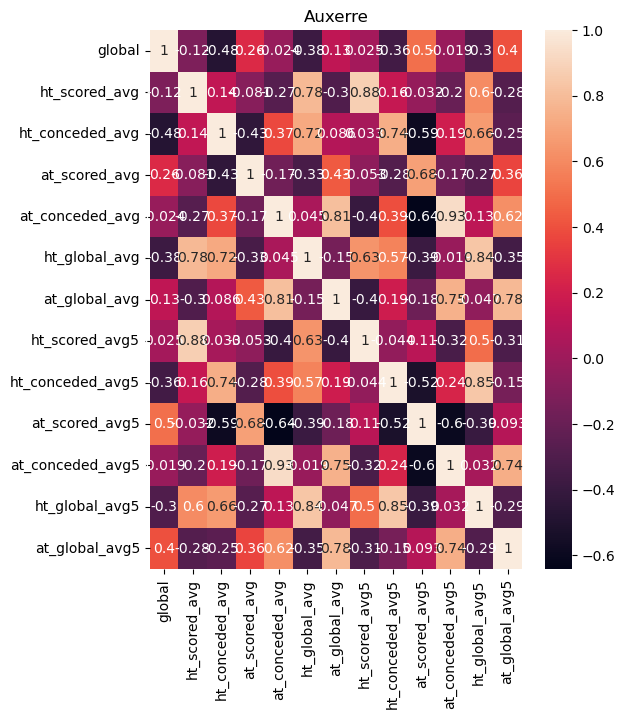

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


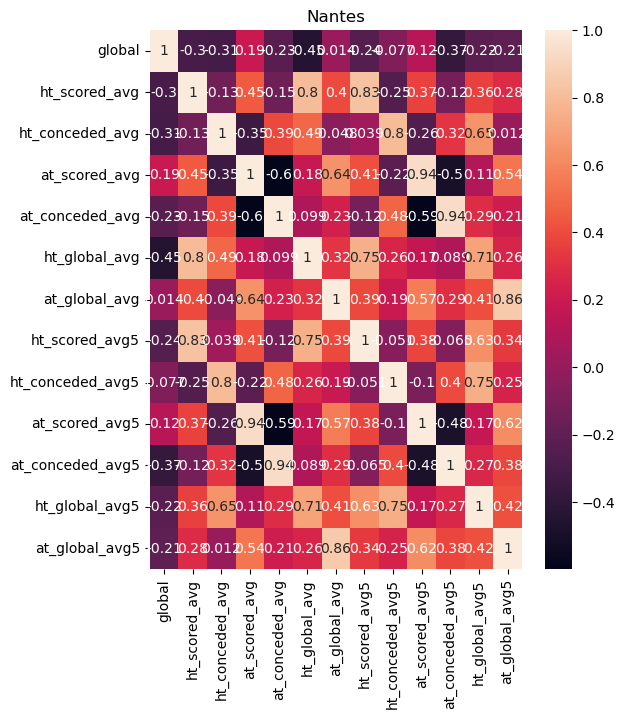

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


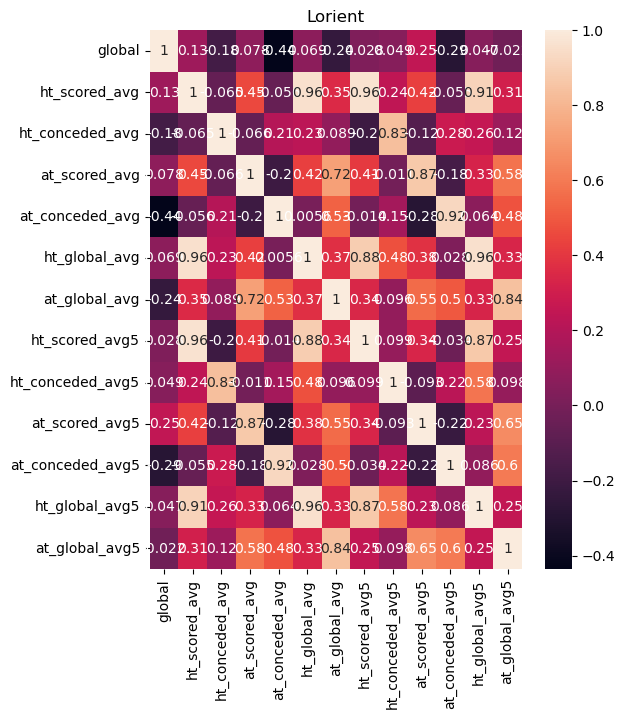

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


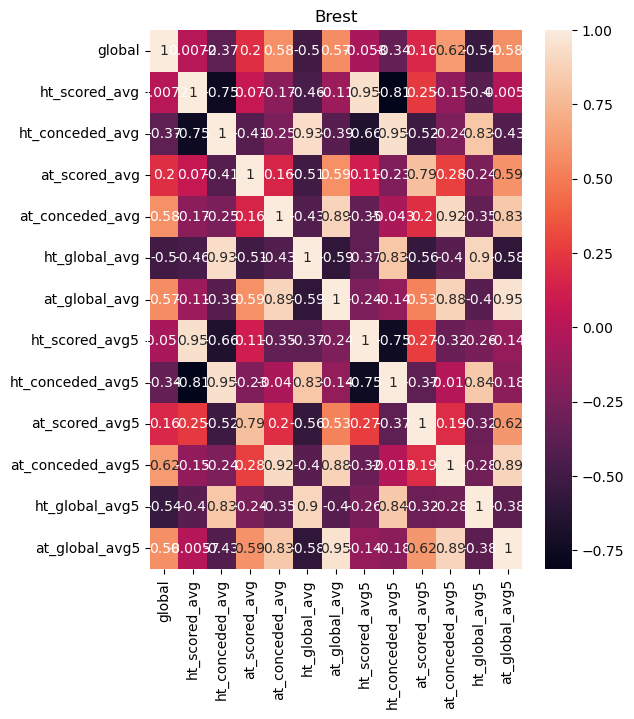

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


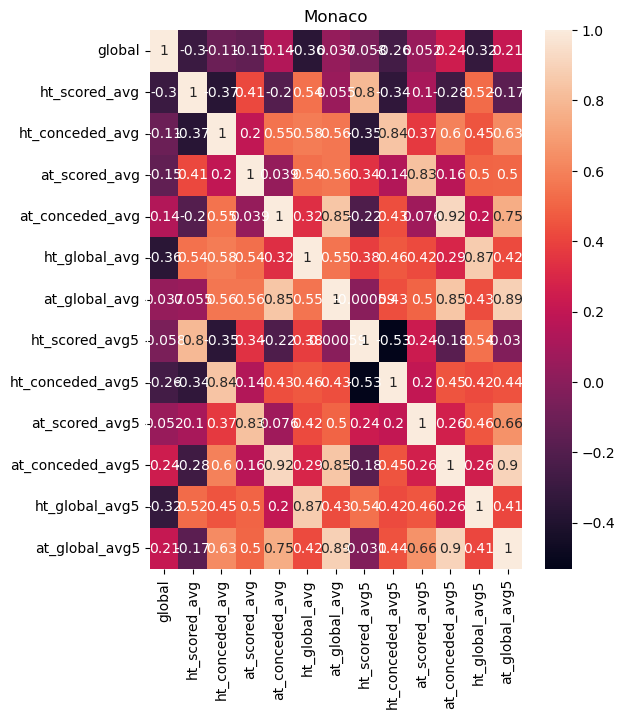

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


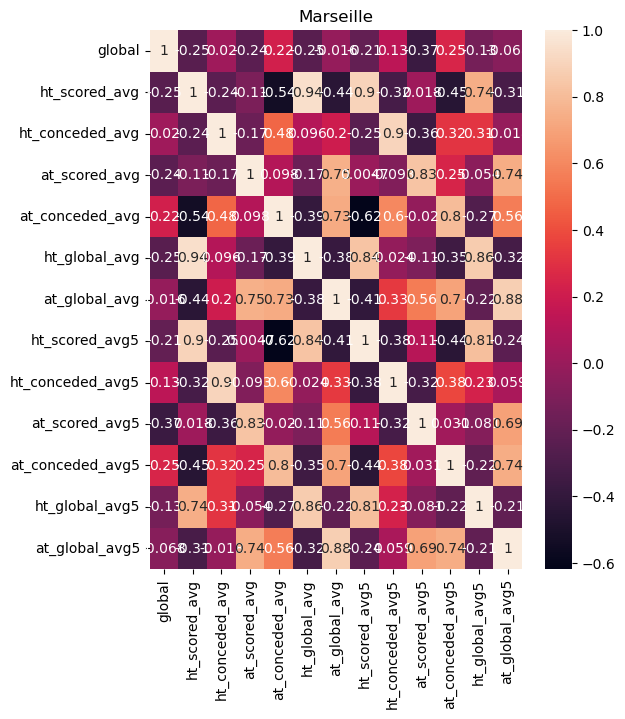

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


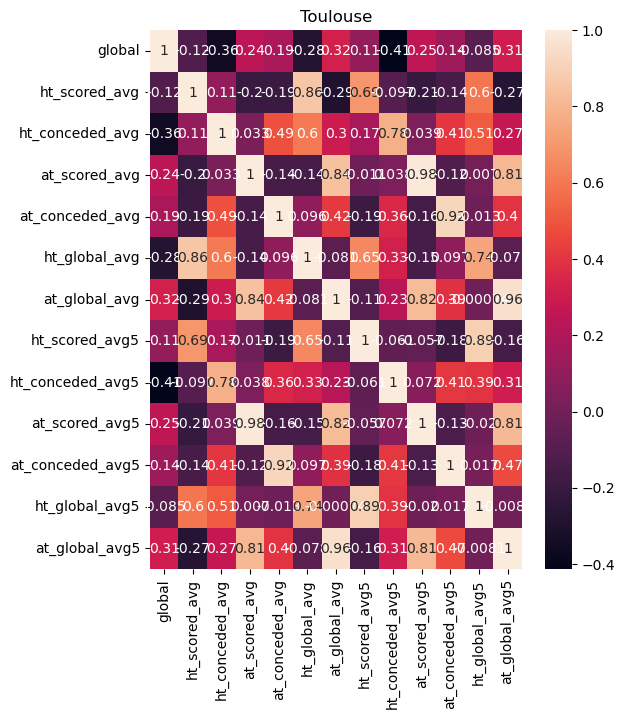

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


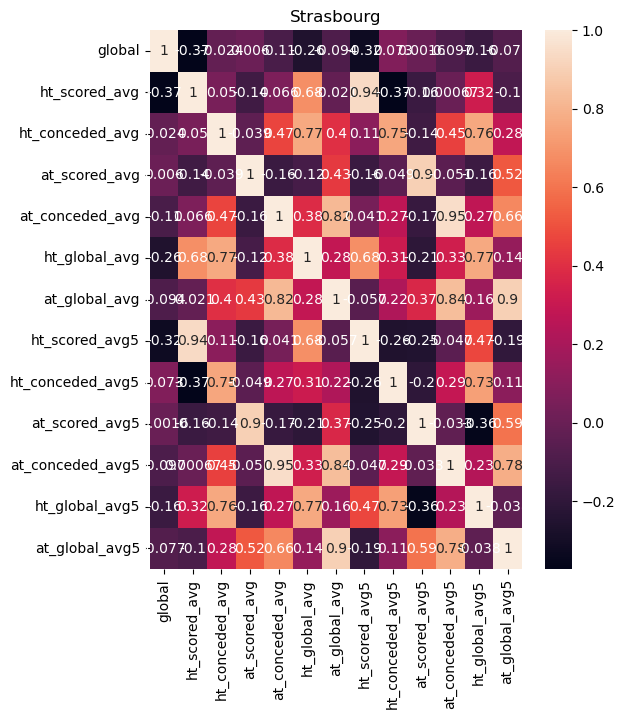

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


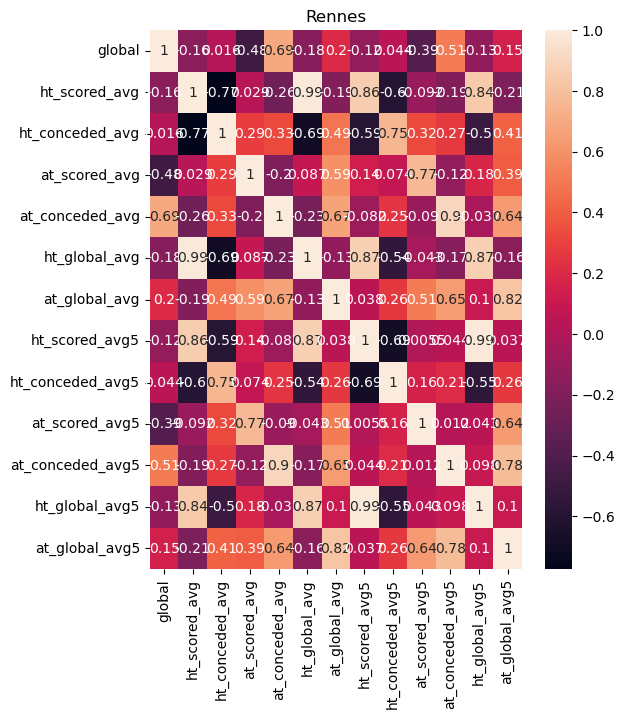

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


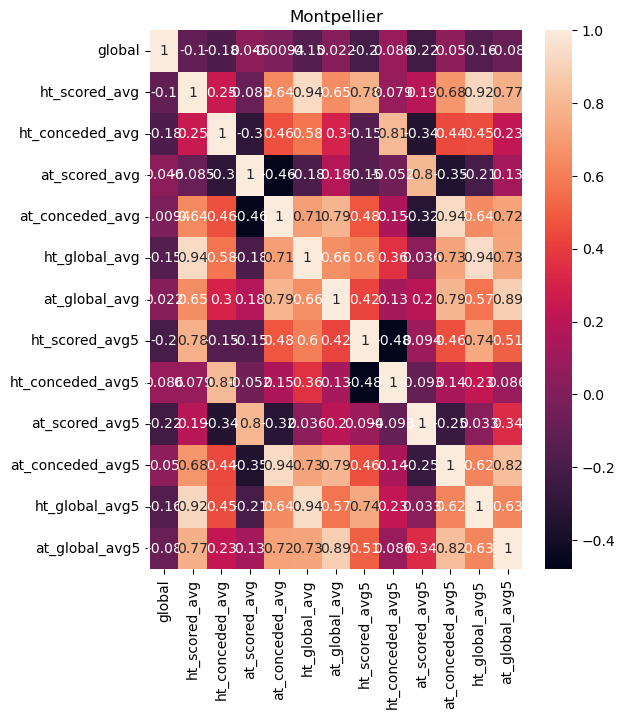

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


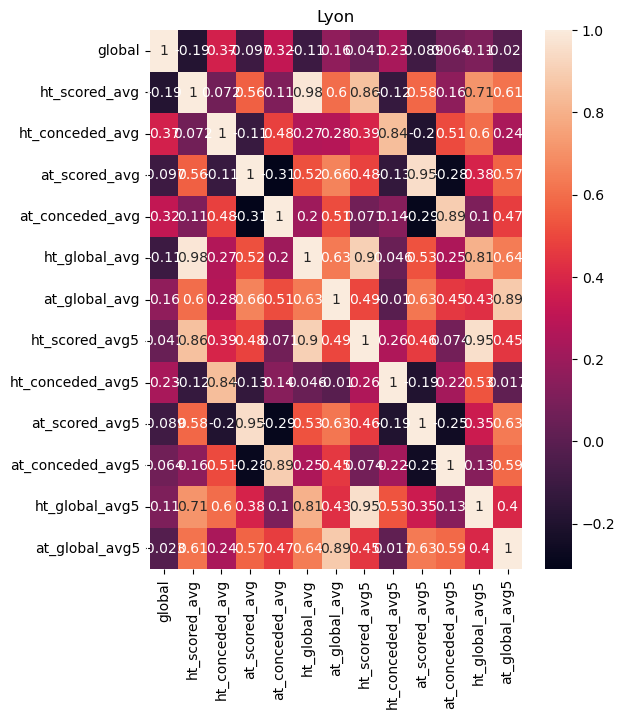

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


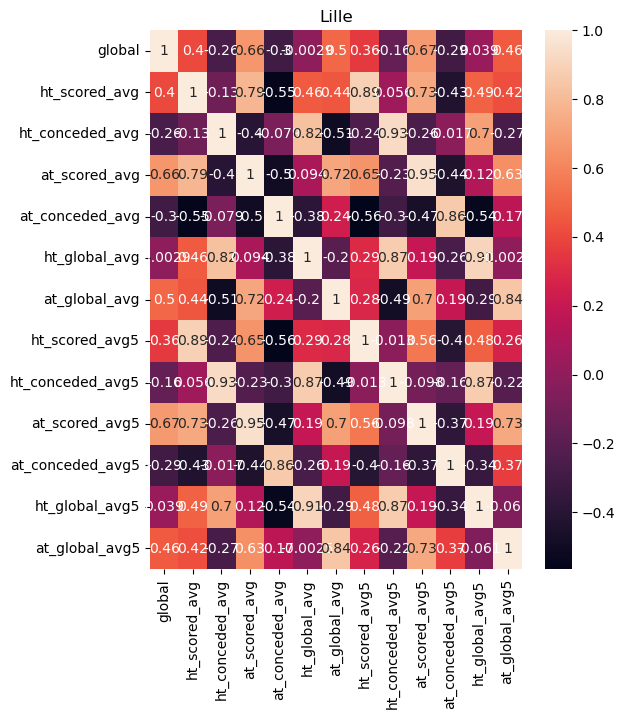

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


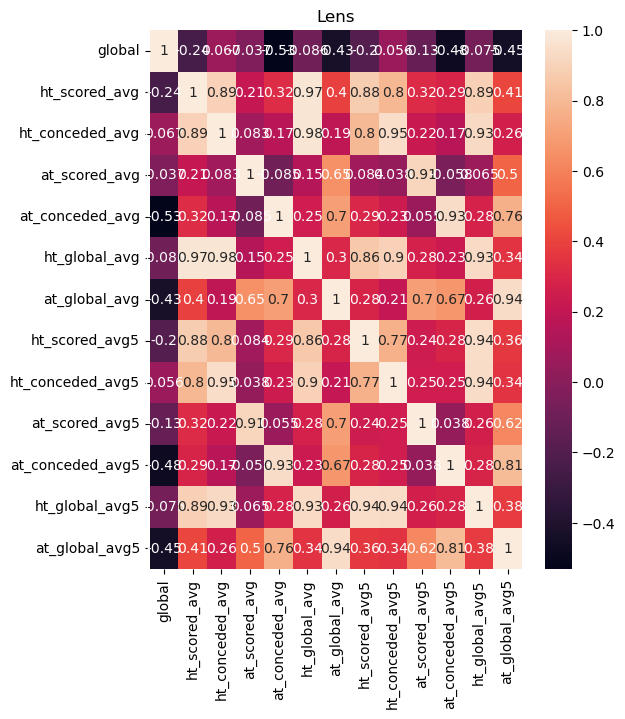

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


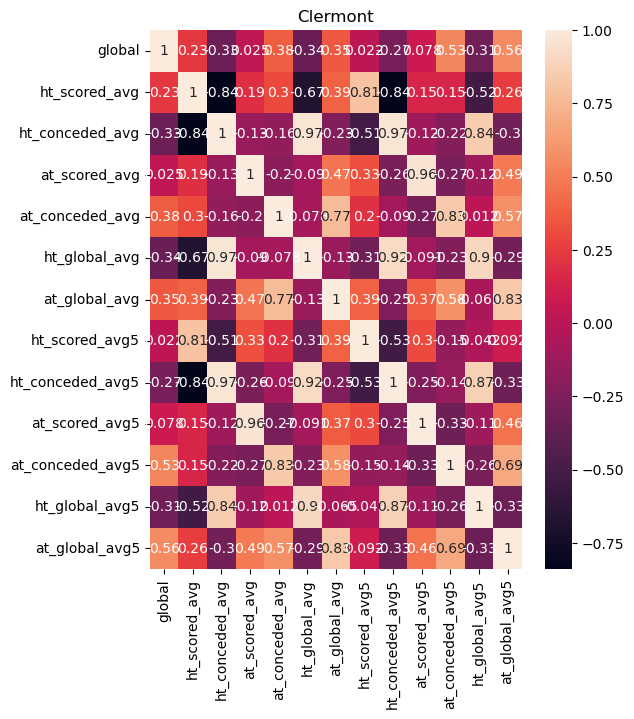

/tmp/ipykernel_5204/2002035872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_home.drop(['journée', 'total_home_team_goal',


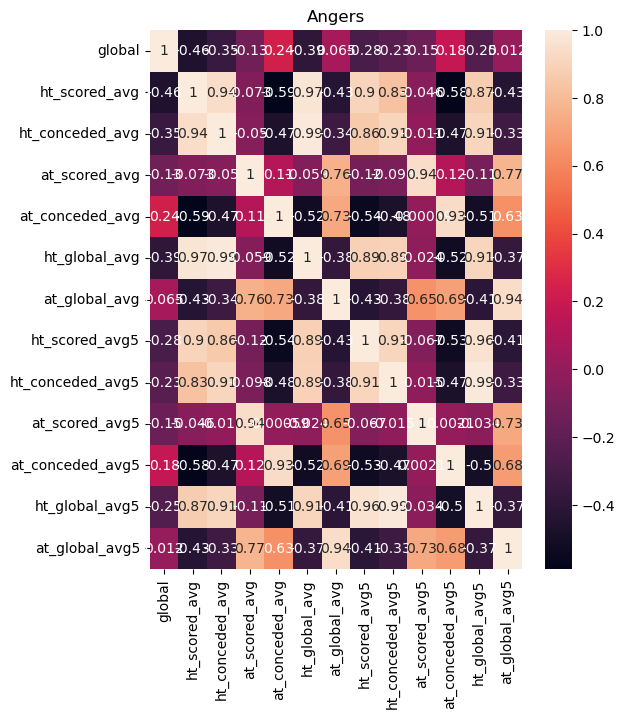

In [37]:
for team in df2.home_team.unique():
    coor(team)

### Interpretation
We see that there is a dependance between the average of